In [189]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [190]:
# Set visualization style
sns.set_theme(style="whitegrid")

In [191]:
def read_data(file_path, index_col=None):
    """
    Read data from CSV or Excel file and drop unnecessary columns.
    
    Returns:
    - df (DataFrame): Filtered DataFrame.
    - headers (list): List of column headers.
    """
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path, index_col=index_col)
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path, index_col=index_col)
    else:
        raise ValueError("Unsupported file format. Please provide a .csv or .xlsx file.")
    
    return df

In [192]:
file_path = "../../../data/dominica-bermant.csv"

In [193]:
df = read_data(file_path, index_col= 'codaNUM2018')

In [194]:
print("Dataset Overview")
print(df.info())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
Index: 8719 entries, 1 to 8878
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8719 non-null   object 
 1   nClicks   8719 non-null   int64  
 2   Duration  8719 non-null   float64
 3   ICI1      8719 non-null   float64
 4   ICI2      8719 non-null   float64
 5   ICI3      8719 non-null   float64
 6   ICI4      8719 non-null   float64
 7   ICI5      8719 non-null   float64
 8   ICI6      8719 non-null   float64
 9   ICI7      8719 non-null   float64
 10  ICI8      8719 non-null   float64
 11  ICI9      8719 non-null   float64
 12  CodaType  8719 non-null   object 
 13  Clan      8719 non-null   object 
 14  Unit      8719 non-null   object 
 15  UnitNum   8719 non-null   int64  
 16  IDN       8719 non-null   object 
dtypes: float64(10), int64(2), object(5)
memory usage: 1.2+ MB
None


In [195]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
Date        0
nClicks     0
Duration    0
ICI1        0
ICI2        0
ICI3        0
ICI4        0
ICI5        0
ICI6        0
ICI7        0
ICI8        0
ICI9        0
CodaType    0
Clan        0
Unit        0
UnitNum     0
IDN         0
dtype: int64


In [196]:
print("Summary Statistics")
print(df.describe(include='all'))

Summary Statistics
                       Date      nClicks     Duration         ICI1  \
count                  8719  8719.000000  8719.000000  8719.000000   
unique                  101          NaN          NaN          NaN   
top     2015-03-02 00:00:00          NaN          NaN          NaN   
freq                    902          NaN          NaN          NaN   
mean                    NaN     5.257828     0.837282     0.258228   
std                     NaN     1.118491     0.407882     0.144061   
min                     NaN     1.000000     0.000000     0.000000   
25%                     NaN     5.000000     0.386500     0.105000   
50%                     NaN     5.000000     0.852383     0.259650   
75%                     NaN     5.000000     1.176800     0.385407   
max                     NaN    10.000000     3.035173     0.798560   

               ICI2         ICI3         ICI4         ICI5         ICI6  \
count   8719.000000  8719.000000  8719.000000  8719.000000  8719.

# Time data analysis

In [197]:
def get_date(date_string: str):
    date_string = date_string.split(' ')[0]
    if date_string.find('-') == 4:
        date_string = date_string[-2:] + '-' + date_string[5: 7] + '-' + date_string[:4]
    return date_string

In [198]:
df_with_date = df.copy()
df_with_date.Date = pd.to_datetime(df.Date.apply(get_date), dayfirst=True)

In [199]:
df_with_date_idx = df_with_date.set_index('Date')
df_with_date_idx.sort_index(inplace=True)
print("DataFrame after setting datetime index:")
df_with_date_idx.head()

DataFrame after setting datetime index:


nClicks  Duration   ICI1   ICI2   ICI3   ICI4   ICI5   ICI6  \
Date                                                                      
2005-01-15       10     0.322  0.028  0.037  0.032  0.031  0.029  0.033   
2005-01-15        5     0.331  0.088  0.099  0.081  0.063  0.000  0.000   
2005-01-15        5     0.319  0.079  0.101  0.076  0.063  0.000  0.000   
2005-01-15        5     0.320  0.076  0.100  0.078  0.066  0.000  0.000   
2005-01-15        5     0.311  0.074  0.081  0.083  0.073  0.000  0.000   

             ICI7   ICI8  ICI9 CodaType Clan Unit  UnitNum IDN  
Date                                                            
2005-01-15  0.037  0.045  0.05      10i  EC1    T       10   0  
2005-01-15  0.000  0.000  0.00      5R1  EC1    T       10   0  
2005-01-15  0.000  0.000  0.00      5R1  EC1    T       10   0  
2005-01-15  0.000  0.000  0.00      5R1  EC1    T       10   0  
2005-01-15  0.000  0.000  0.00      5R1  EC1    T       10   0

In [200]:
non_numeric_columns = df_with_date_idx.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_columns)
numeric_columns = df_with_date_idx.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_columns)

Non-Numeric Columns: Index(['CodaType', 'Clan', 'Unit', 'IDN'], dtype='object')
Numeric Columns: Index(['nClicks', 'Duration', 'ICI1', 'ICI2', 'ICI3', 'ICI4', 'ICI5', 'ICI6',
       'ICI7', 'ICI8', 'ICI9', 'UnitNum'],
      dtype='object')


In [201]:
df_numeric = df_with_date_idx.select_dtypes(include=[np.number])

In [202]:
df_monthly = df_numeric.resample('YE').mean()
df_monthly

nClicks  Duration      ICI1      ICI2      ICI3      ICI4  \
Date                                                                     
2005-12-31  5.311905  0.686483  0.219788  0.205692  0.126331  0.112127   
2006-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2007-12-31  5.025000  0.886533  0.282413  0.284245  0.169703  0.143660   
2008-12-31  5.373333  0.845557  0.238968  0.229526  0.167280  0.157324   
2009-12-31  5.036184  0.732557  0.241182  0.222672  0.142215  0.107491   
2010-12-31  5.348485  0.657465  0.206524  0.181088  0.125362  0.099494   
2011-12-31  5.724138  1.305504  0.283929  0.280723  0.283149  0.283278   
2012-12-31  5.476526  1.178783  0.270291  0.266748  0.272151  0.271181   
2013-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2014-12-31  5.115869  0.950740  0.306540  0.301346  0.184753  0.134707   
2015-12-31  5.134862  0.924175  0.305156  0.290045  0.163240  0.135331   
2016-12-31  5.194836  0.942454  0.275086  0.268408  0.193073  0.155849   

                ICI5      ICI6      ICI7      ICI8      ICI9   UnitNum  
Date                                                                    
2005-12-31  0.009397  0.007192  0.003408  0.001721  0.000826  3.102381  
2006-12-31       NaN       NaN       NaN       NaN       NaN       NaN  
2007-12-31  0.006513  0.000000  0.000000  0.000000  0.000000  4.000000  
2008-12-31  0.023833  0.014164  0.008462  0.004676  0.001323  5.579048  
2009-12-31  0.008189  0.005013  0.003342  0.002278  0.000174  4.753289  
2010-12-31  0.020849  0.014208  0.005991  0.002970  0.000978  6.677933  
2011-12-31  0.094969  0.038842  0.024753  0.012787  0.003073  7.000000  
2012-12-31  0.041586  0.026837  0.014433  0.009681  0.005874  5.000000  
2013-12-31       NaN       NaN       NaN       NaN       NaN       NaN  
2014-12-31  0.011937  0.004786  0.003363  0.002498  0.000787  5.193955  
2015-12-31  0.013561  0.007946  0.005173  0.002679  0.001044  5.188469  
2016-12-31  0.016982  0.012413  0.011124  0.005995  0.003525  6.535211

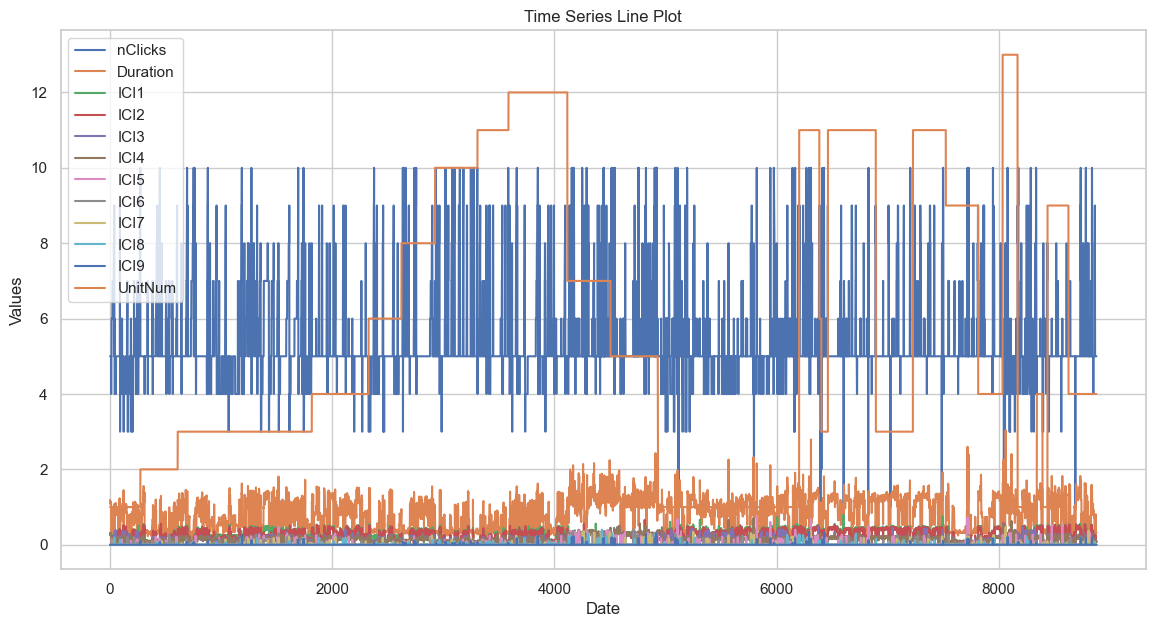

In [203]:
plt.figure(figsize=(14, 7))
for col in numeric_columns:
    plt.plot(df.index, df[col], label=col)
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

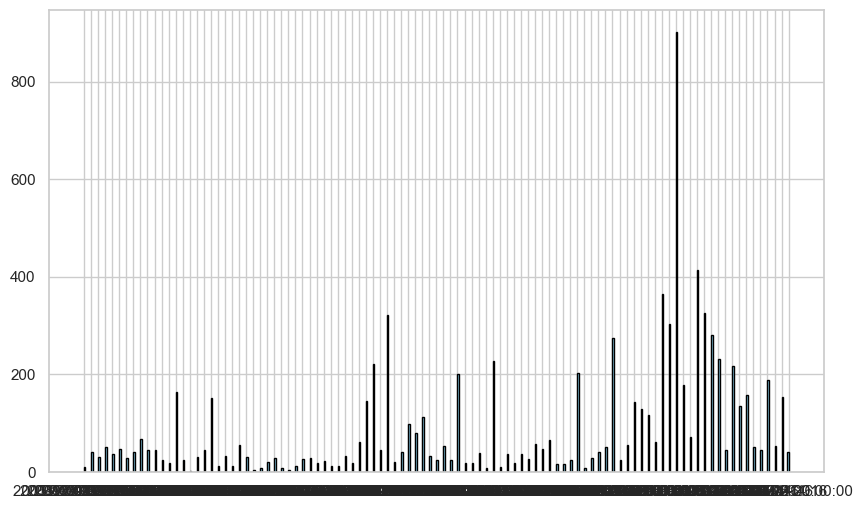

In [228]:
plt.figure(figsize=(10, 6))
plt.hist(df.Date, bins=500, color='skyblue', edgecolor='black')
plt.show()

# Numerical Data Analysis

In [215]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['nClicks', 'Duration', 'ICI1', 'ICI2', 'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'UnitNum']


In [216]:
# Summary statistics
print("Numerical Summary Statistics:\n", df[numerical_cols].describe())

Numerical Summary Statistics:
            nClicks     Duration         ICI1         ICI2         ICI3  \
count  8719.000000  8719.000000  8719.000000  8719.000000  8719.000000   
mean      5.257828     0.837282     0.258228     0.242347     0.159417   
std       1.118491     0.407882     0.144061     0.133588     0.082596   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     0.386500     0.105000     0.101000     0.079700   
50%       5.000000     0.852383     0.259650     0.248490     0.162000   
75%       5.000000     1.176800     0.385407     0.354738     0.202531   
max      10.000000     3.035173     0.798560     0.660200     0.593074   

              ICI4         ICI5         ICI6         ICI7         ICI8  \
count  8719.000000  8719.000000  8719.000000  8719.000000  8719.000000   
mean      0.134930     0.019075     0.011777     0.006559     0.003563   
std       0.085942     0.055907     0.040322     0.030693     0.022442   
min   

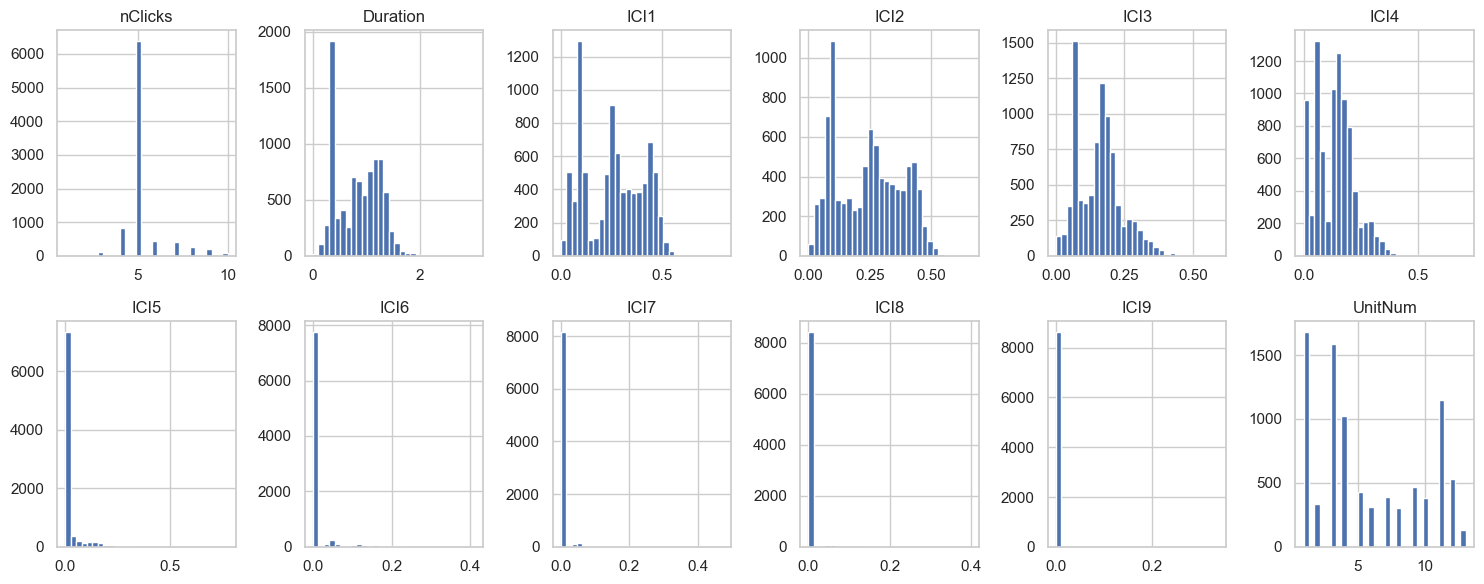

In [220]:
# Histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(15, 6), layout=(2, len(numerical_cols)//2))
plt.tight_layout()
plt.show()

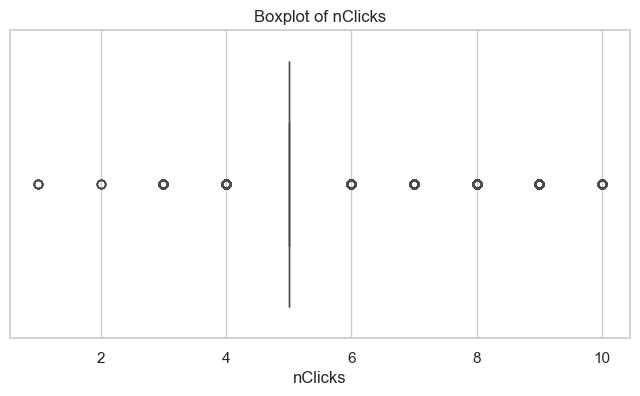

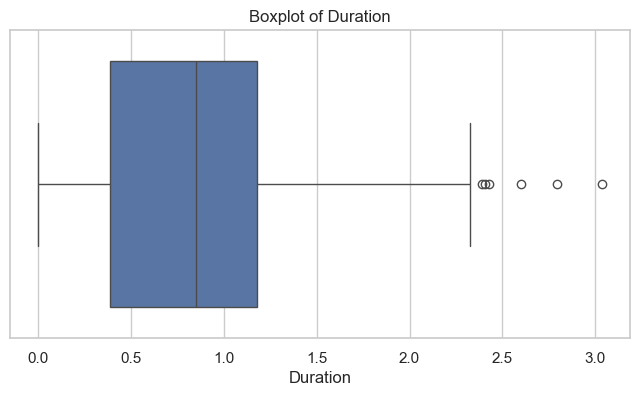

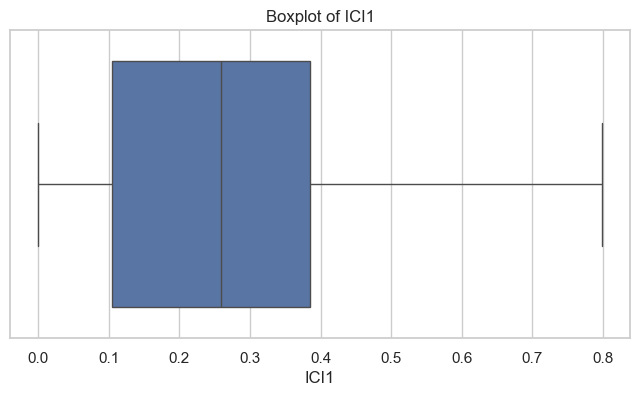

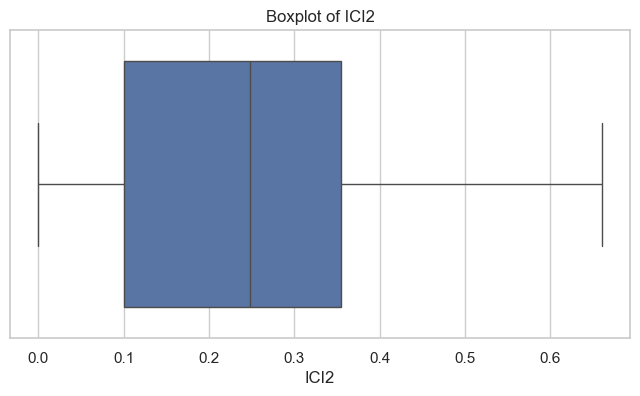

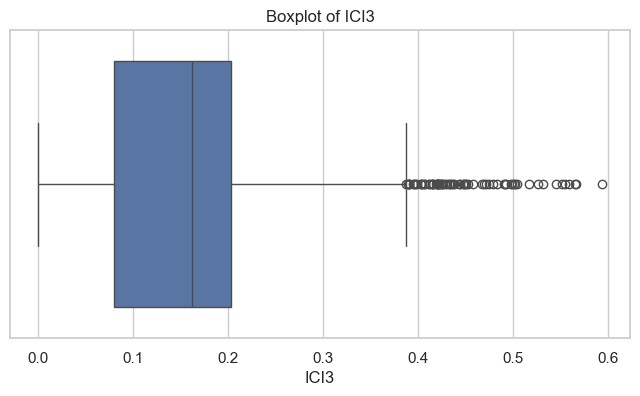

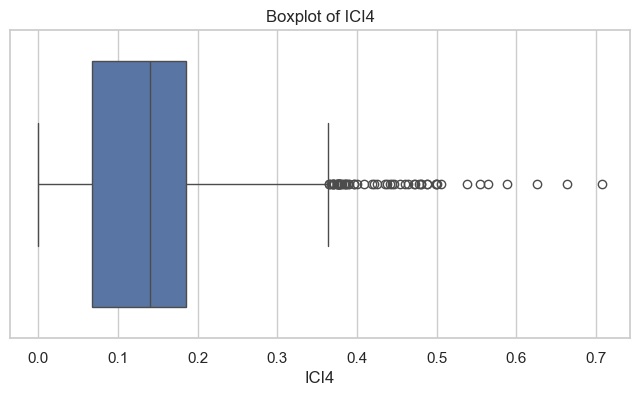

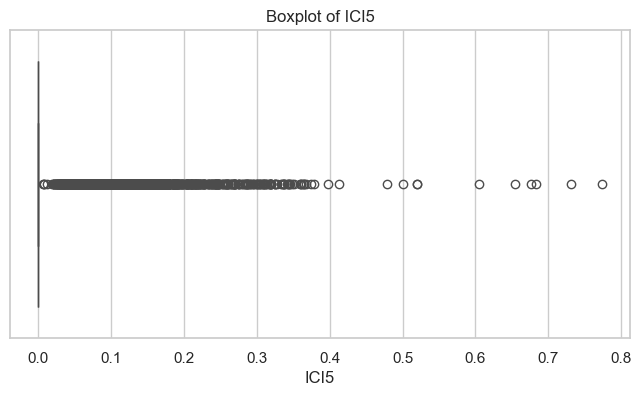

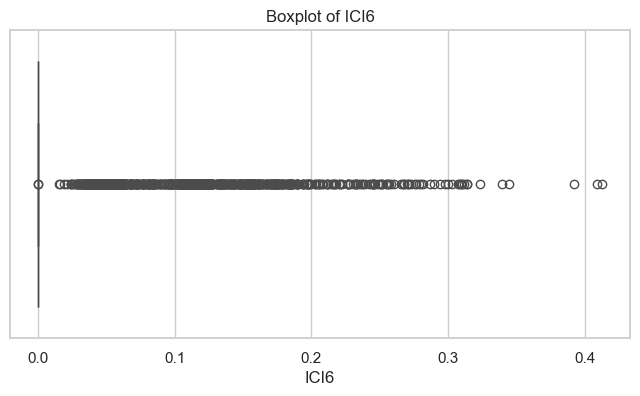

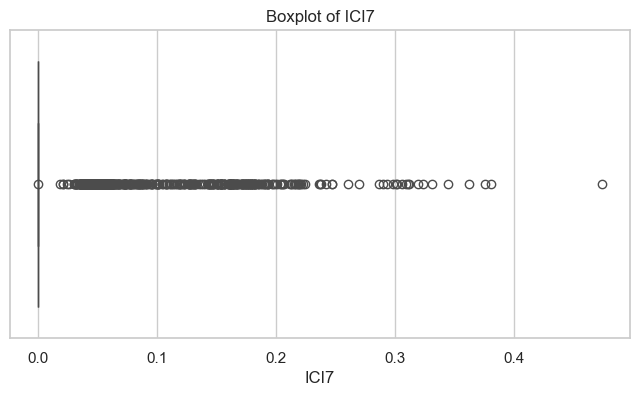

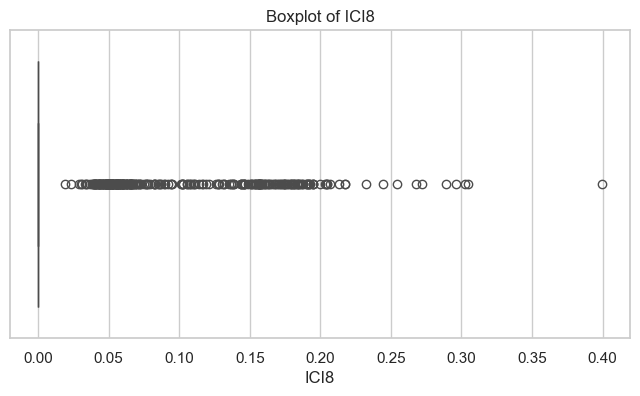

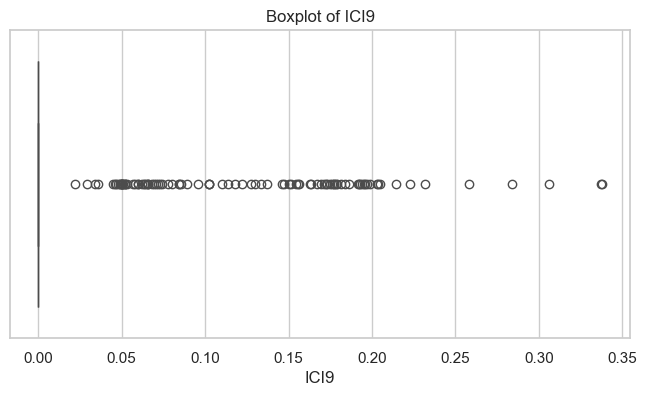

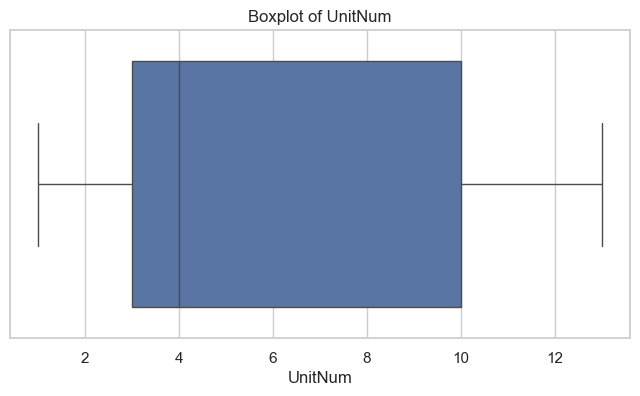

In [218]:
# Boxplots for numerical columns to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

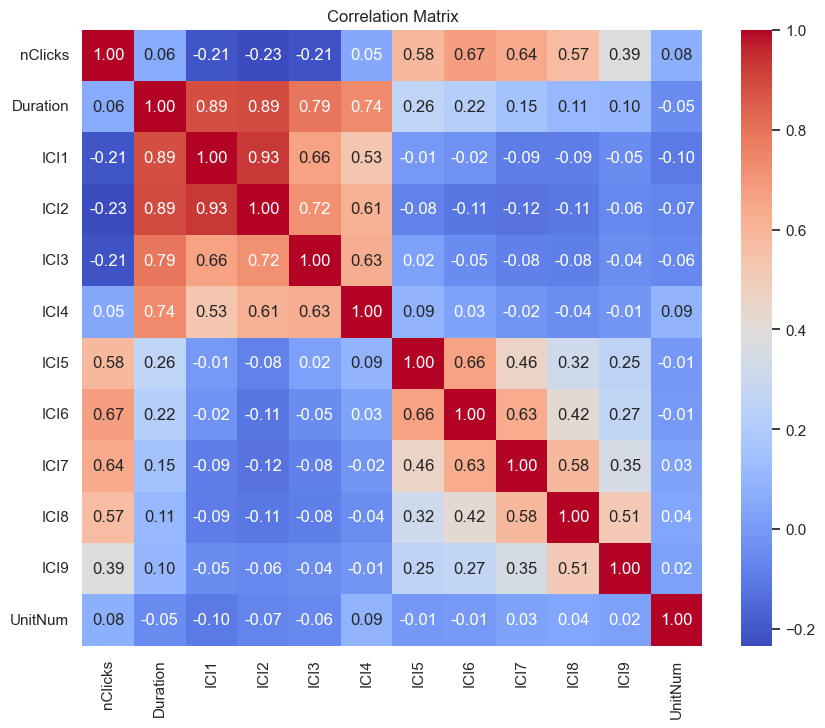

In [219]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

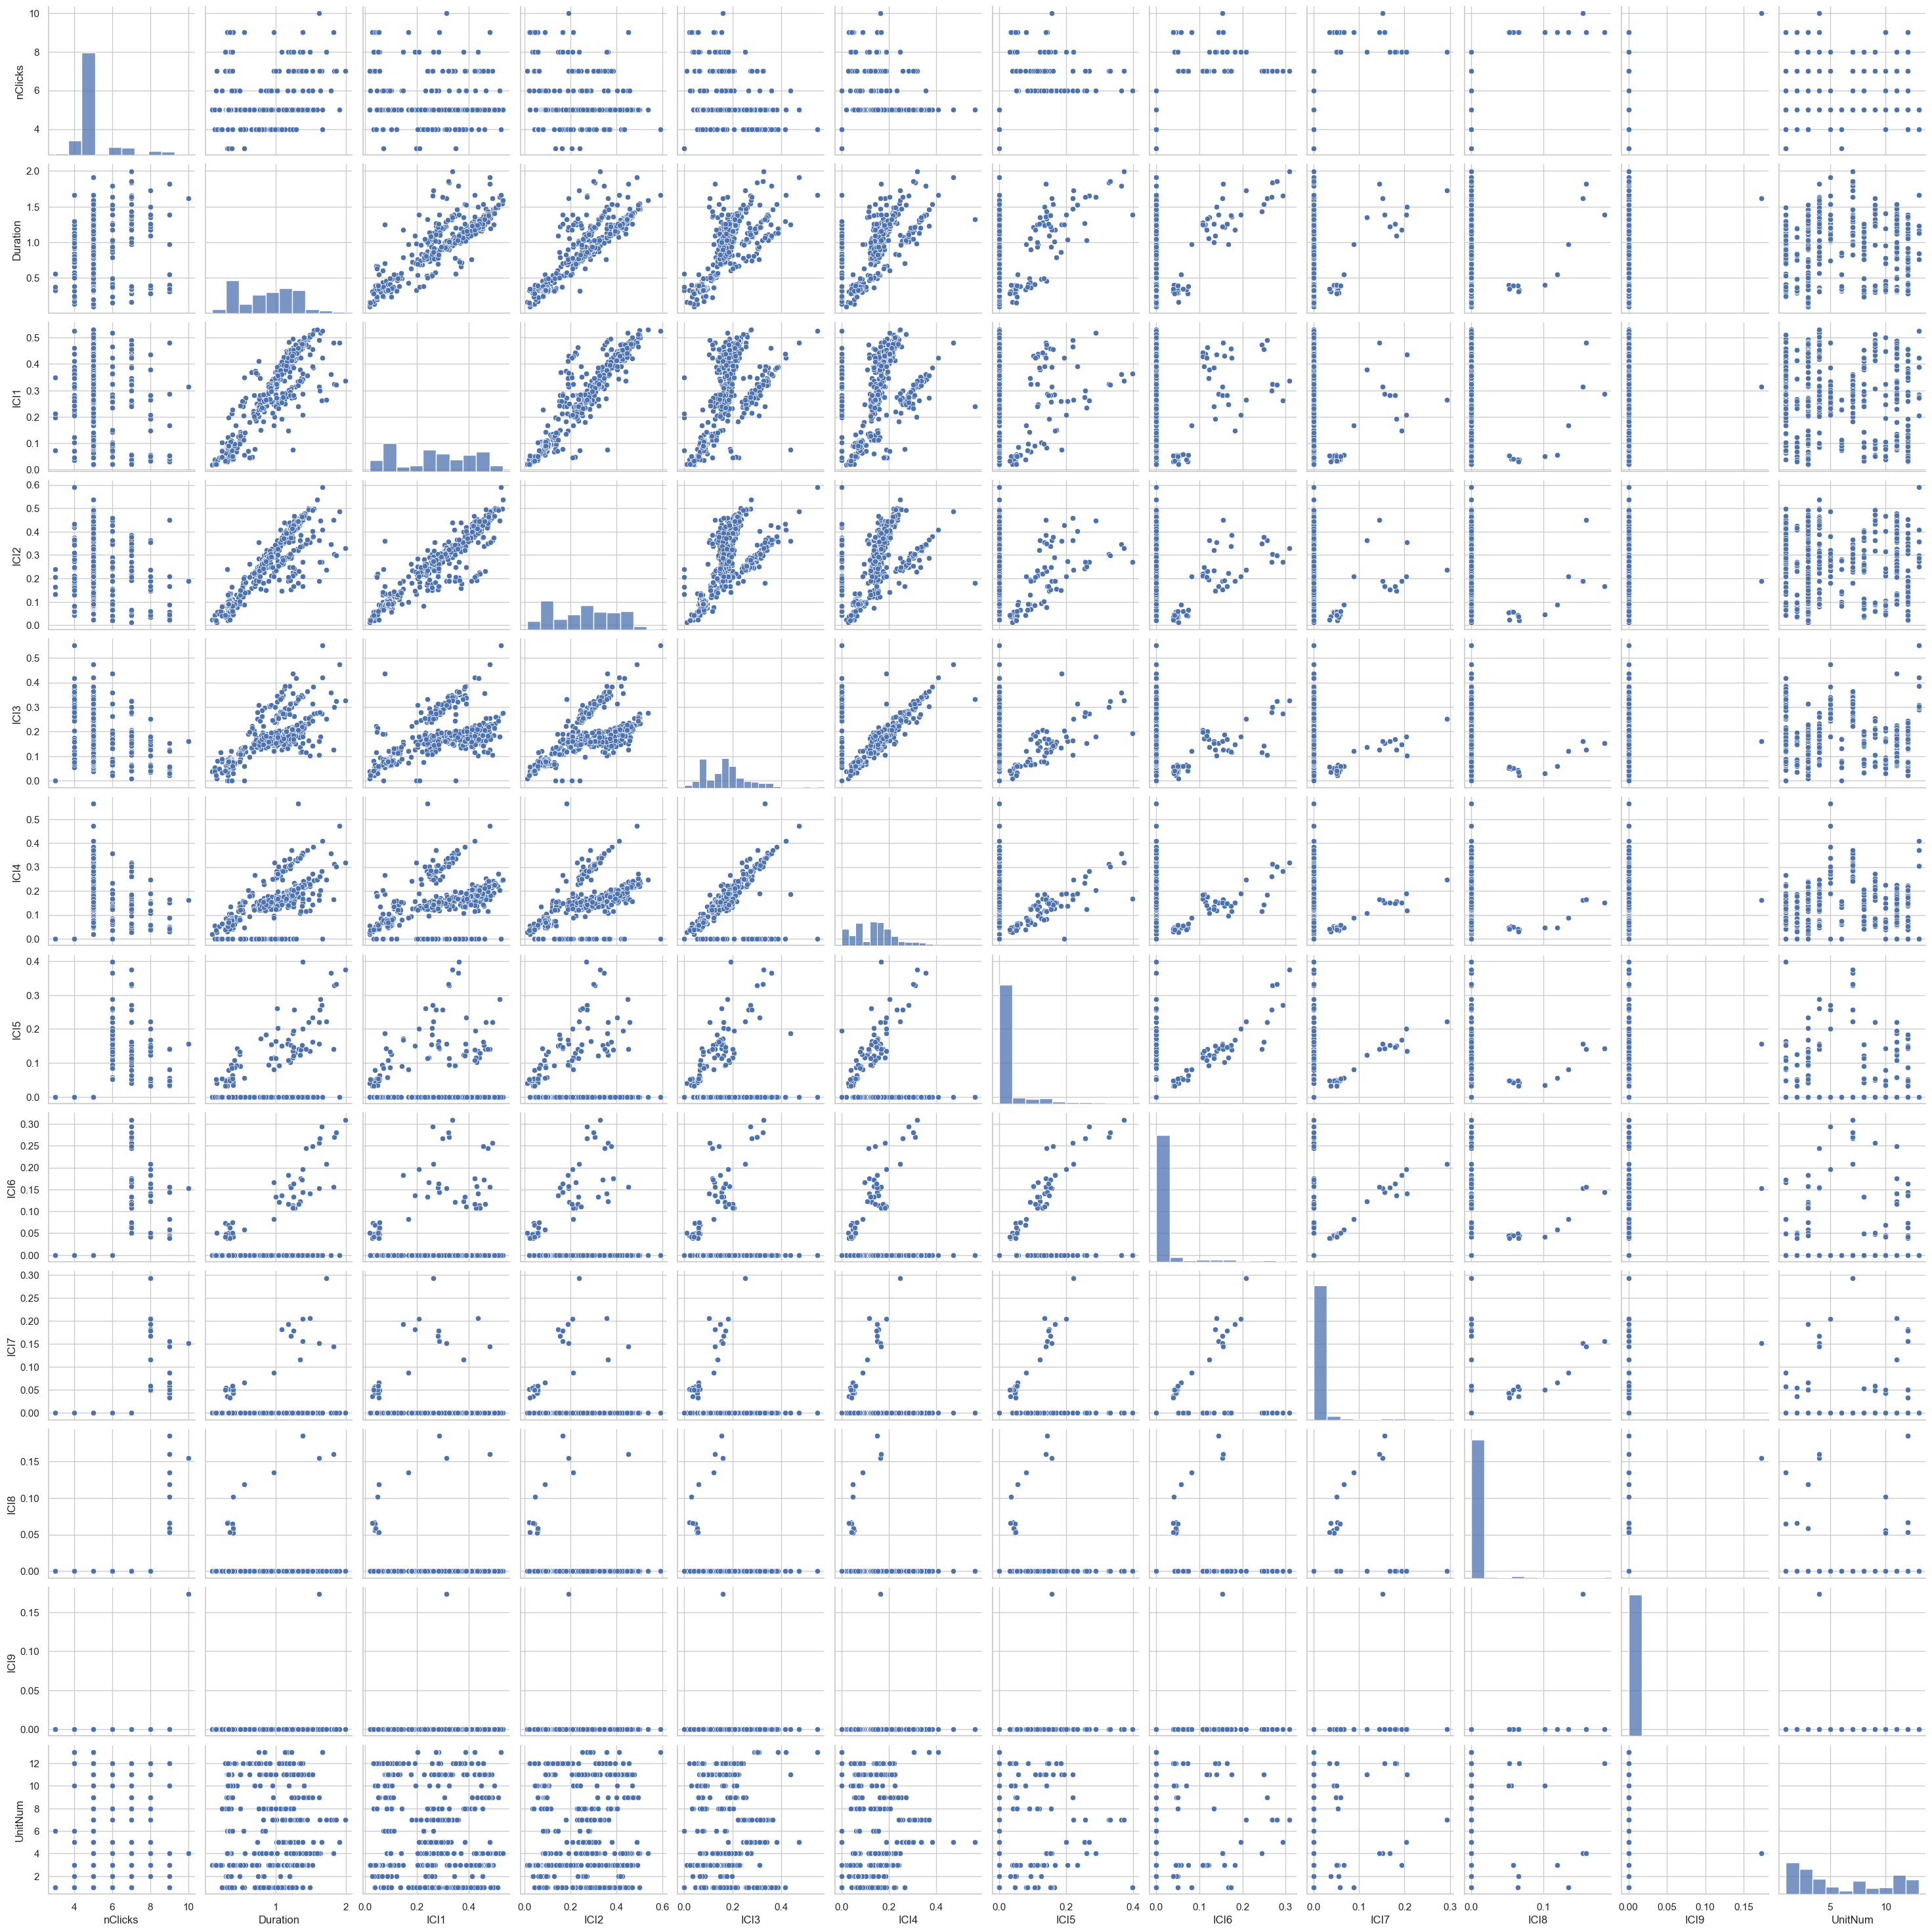

In [224]:
# Pairplot for numerical columns (sampled for large datasets)
sampled_df = df[numerical_cols].dropna().sample(n=500) if len(df) > 500 else df[numerical_cols].dropna()
sns.pairplot(sampled_df)
plt.show()

# Categorical Data Analysis


Categorical Columns: ['CodaType', 'Clan', 'Unit', 'IDN']

Value counts for CodaType:
 CodaType
1+1+3       3589
5R1         1510
5R3          642
4R2          340
5R2          287
5-NOISE      280
4D           219
6i           188
8i           178
7D1          177
6-NOISE      172
7i           151
9i           137
4R1           84
2+3           77
1+32          72
6R            67
3D            61
8R            60
10i           55
4-NOISE       51
1+31          51
9R            43
7D2           35
10R           32
7R            23
3-NOISE       21
3R            21
8D            20
7-NOISE       19
8-NOISE       17
9-NOISE       16
10-NOISE       9
1-NOISE        9
2-NOISE        6
Name: count, dtype: int64

Value counts for Clan:
 Clan
EC1    7770
EC2     949
Name: count, dtype: int64

Value counts for Unit:
 Unit
A      1680
F      1587
U      1152
J      1024
V       530
S       464
K       426
P       388
T       382
D       336
N       313
R       302
ZZZ     135
Name: count, dtyp

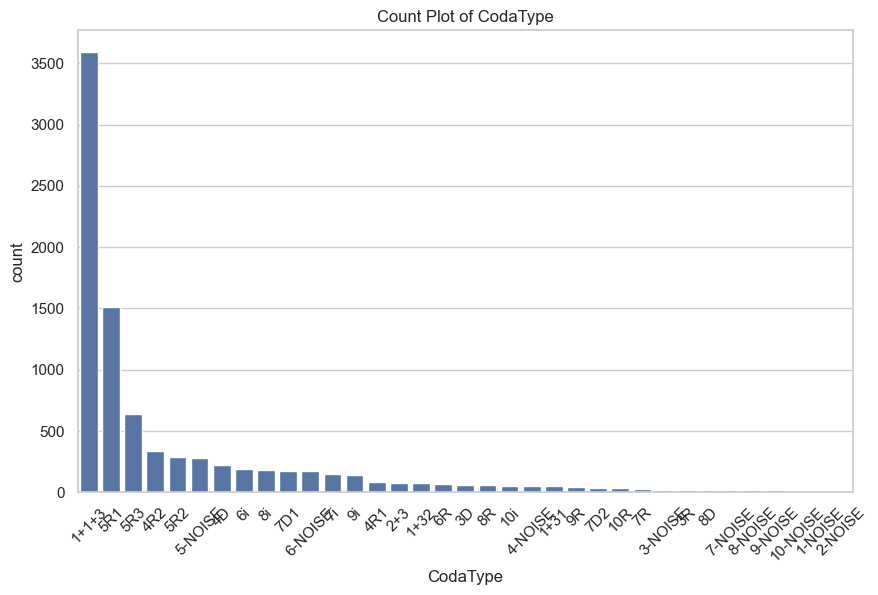

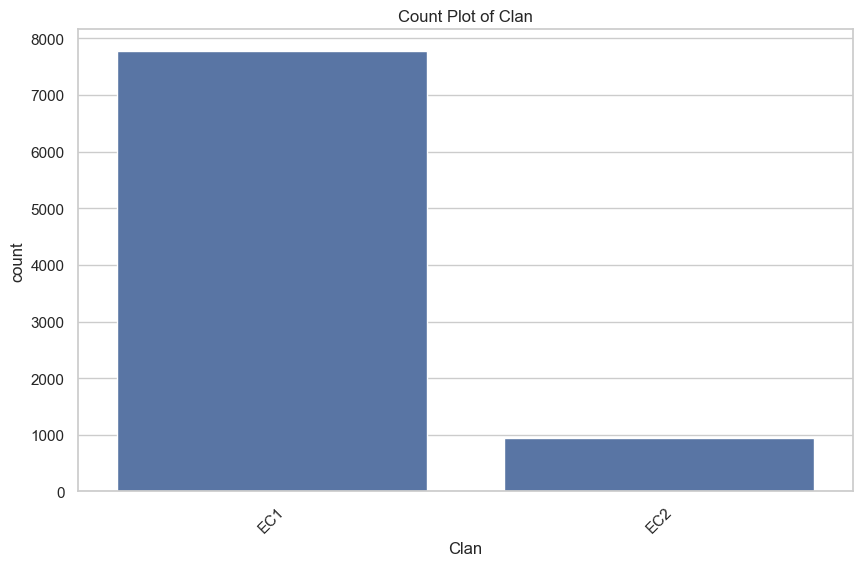

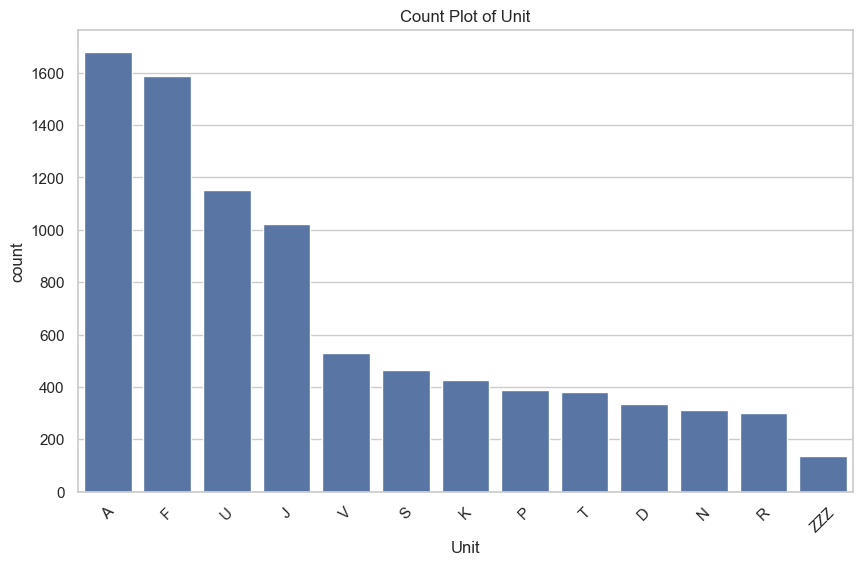

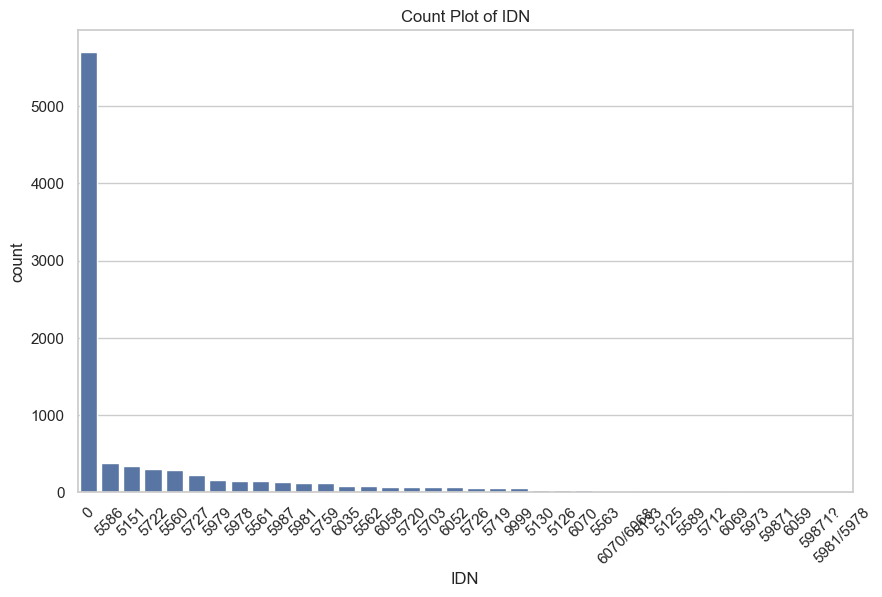

In [222]:
# Identify categorical columns
categorical_cols = df_with_date.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

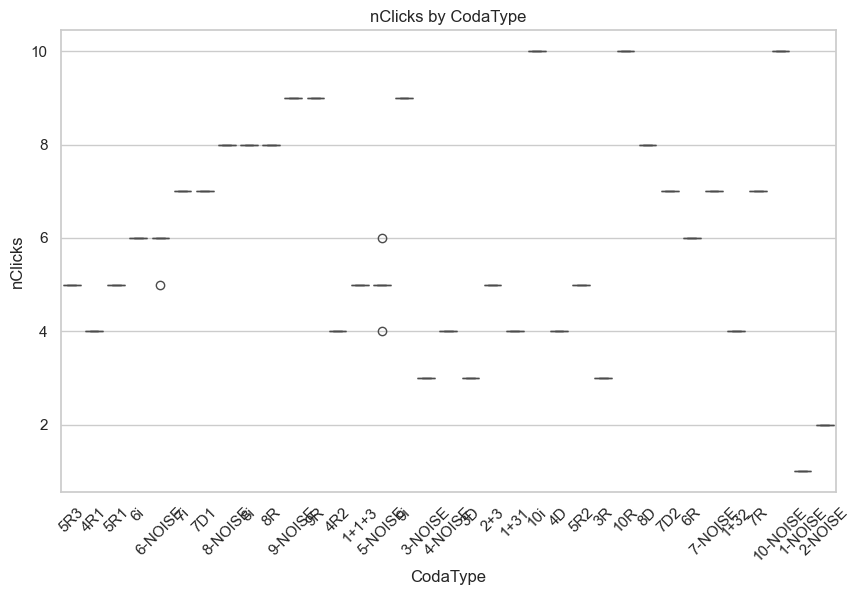

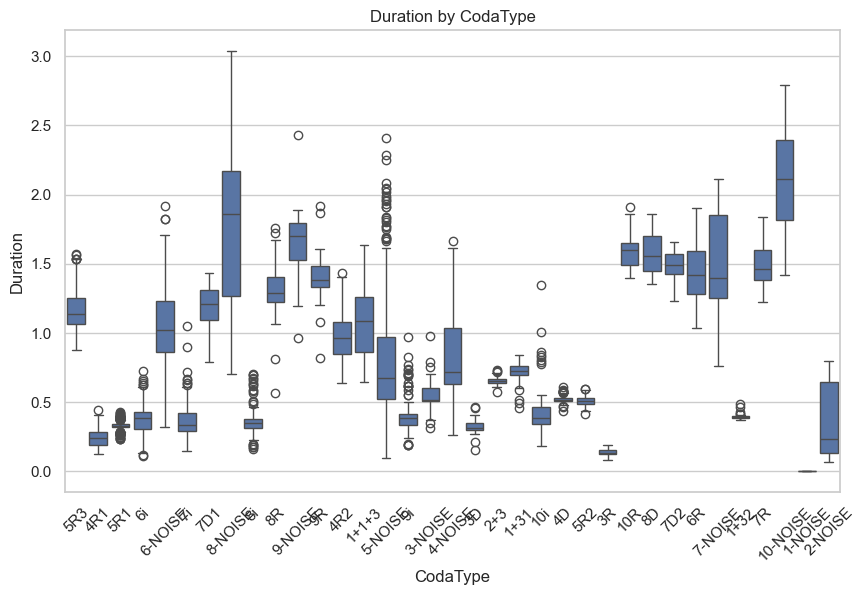

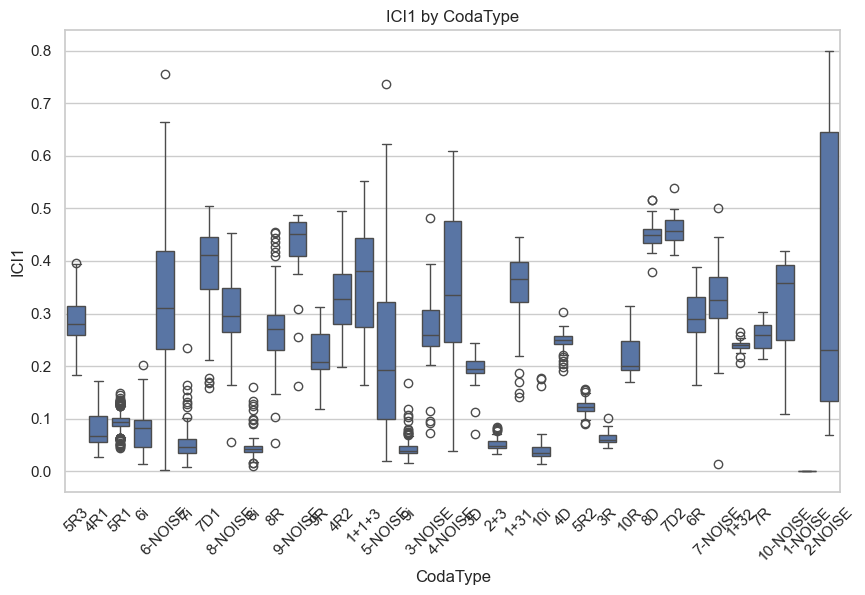

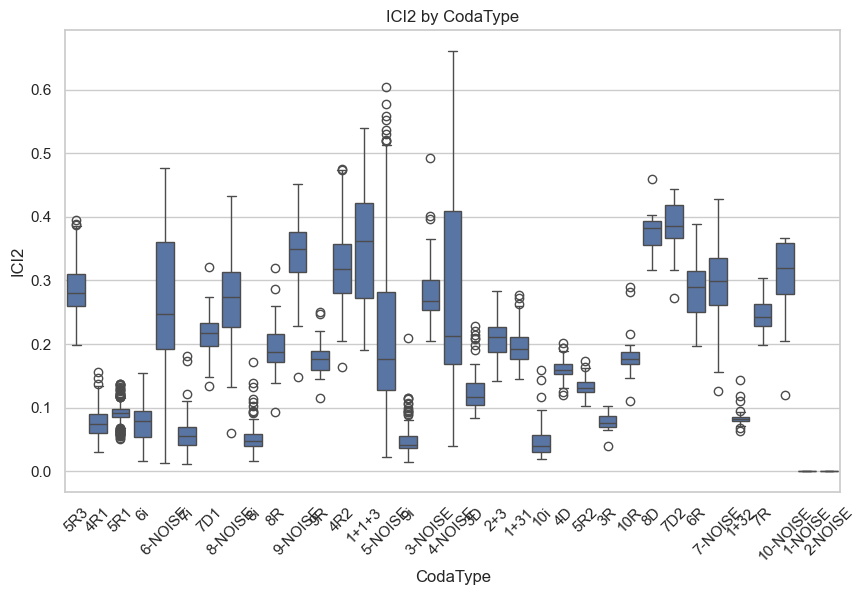

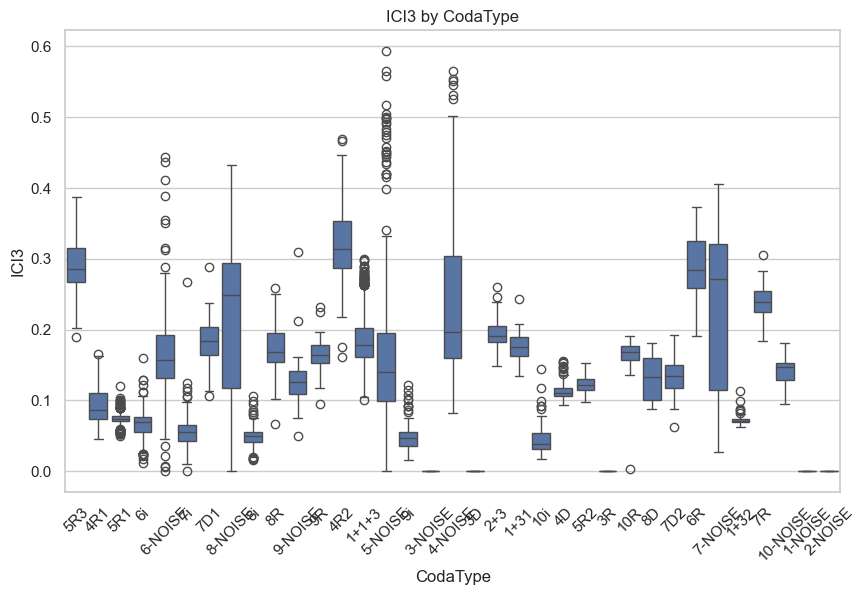

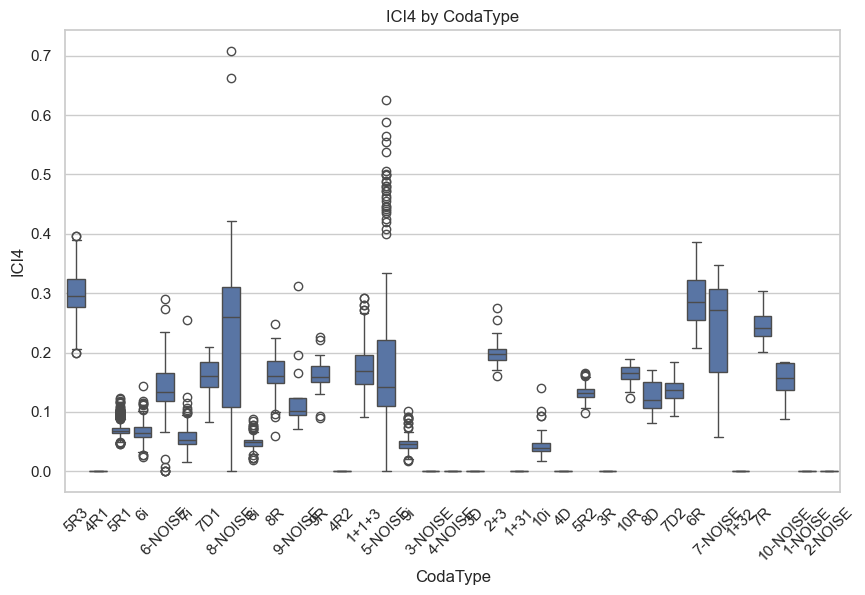

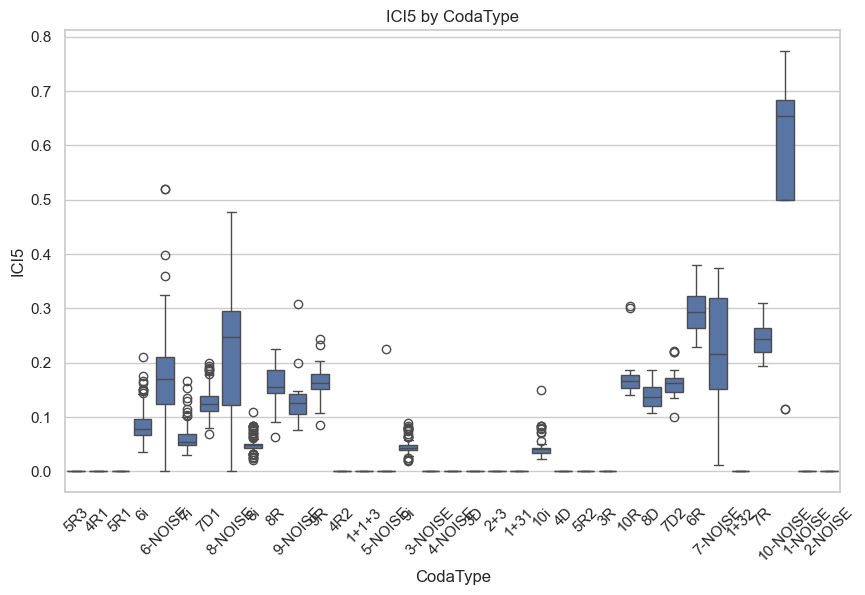

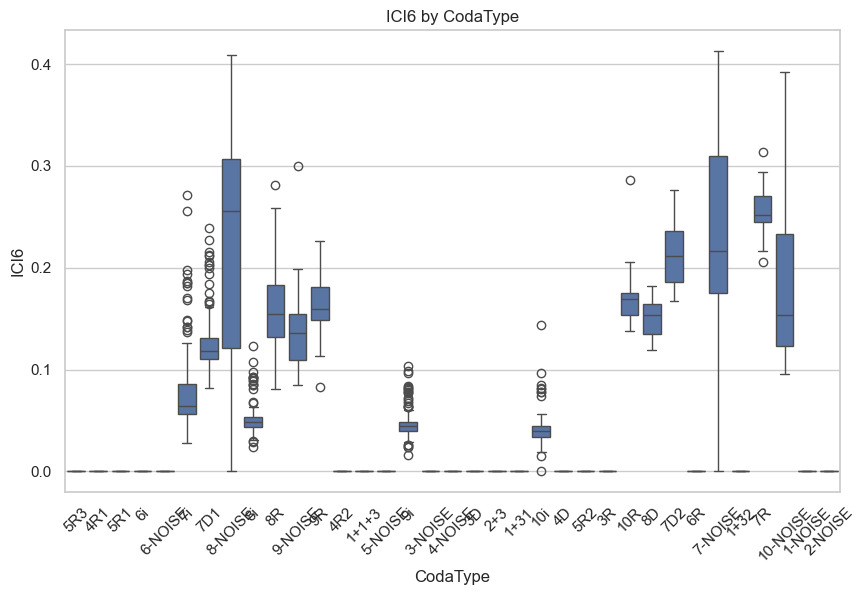

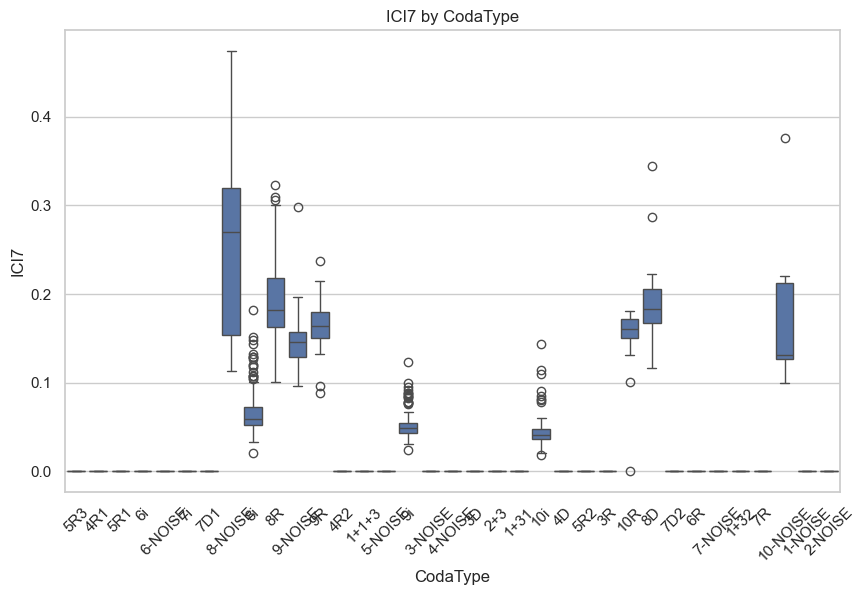

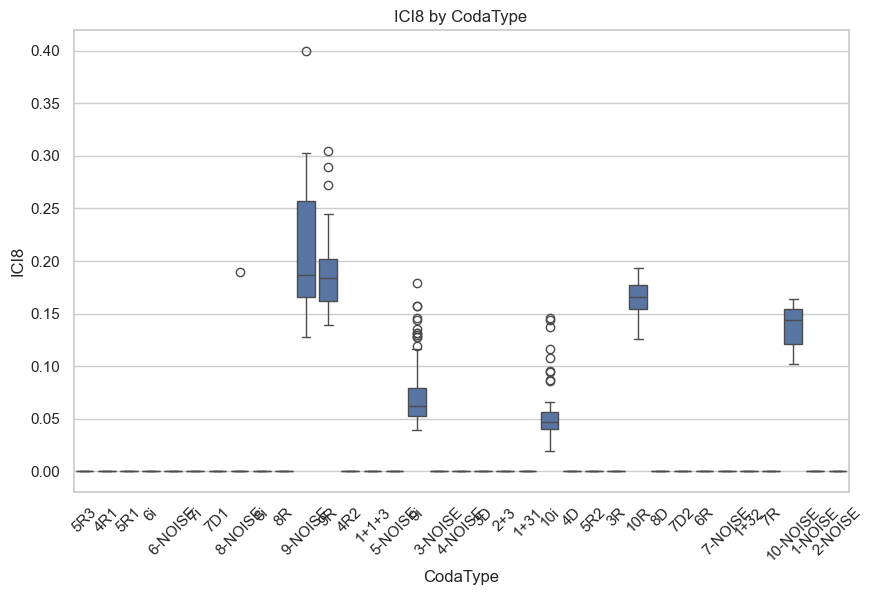

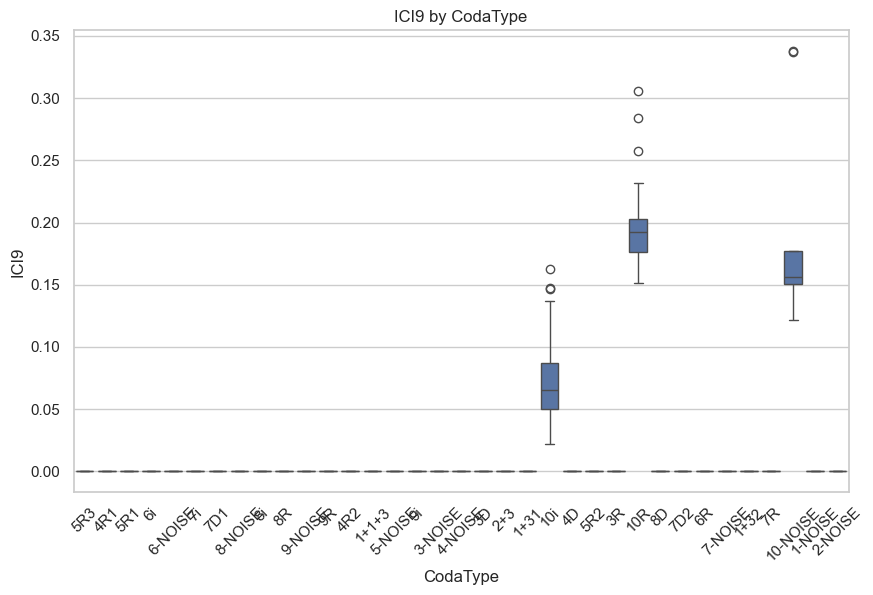

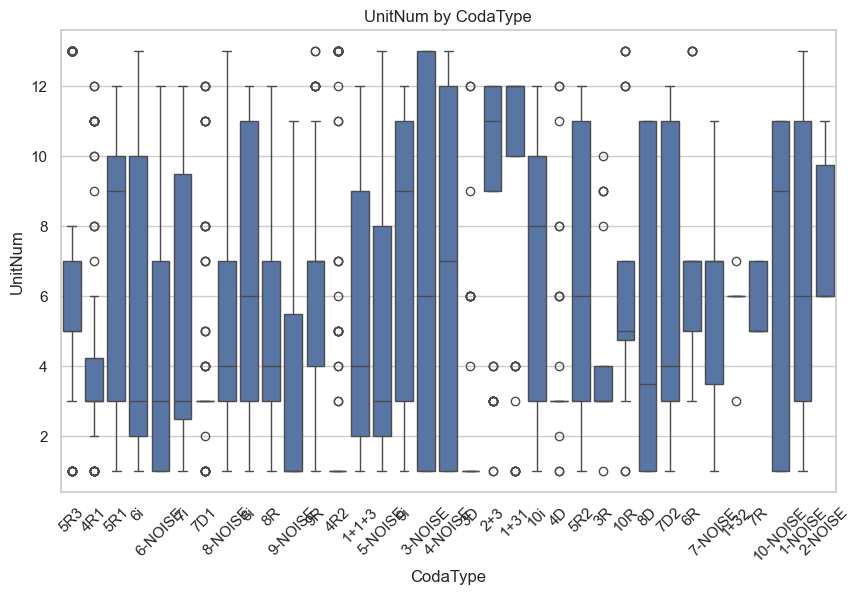

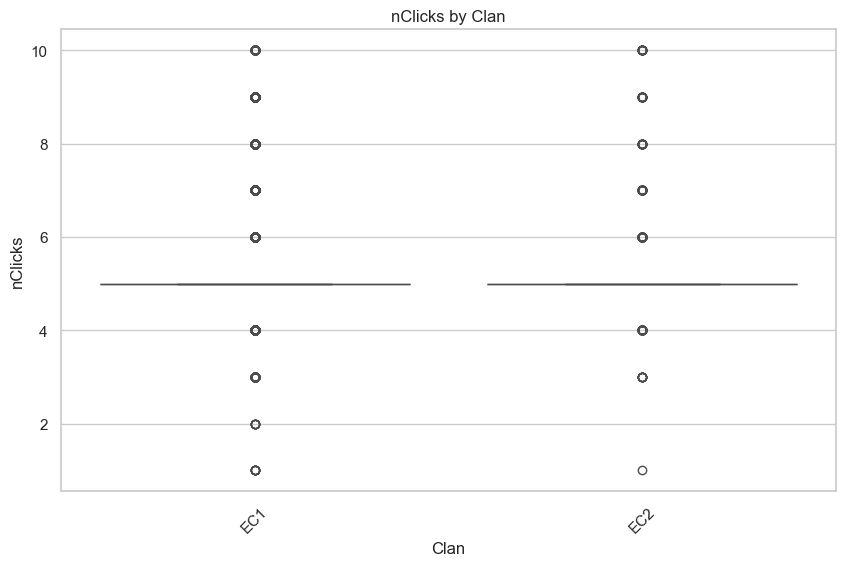

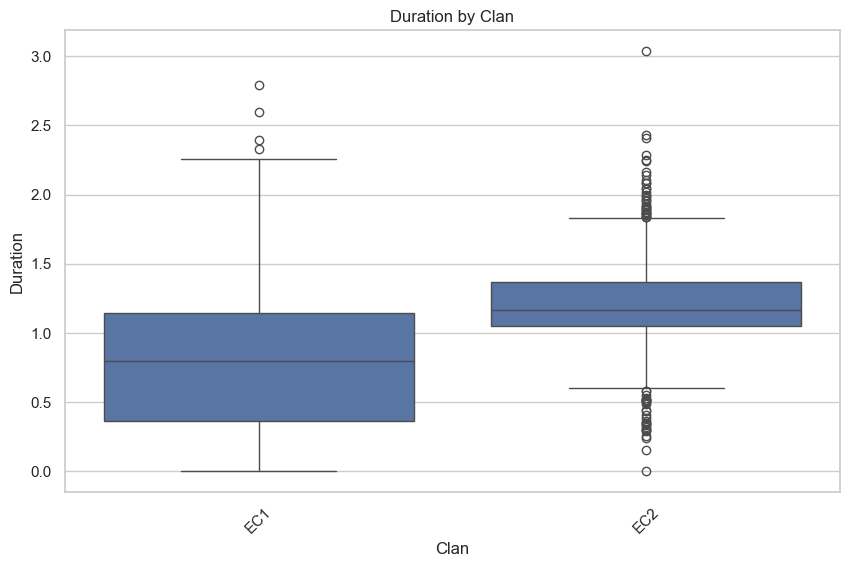

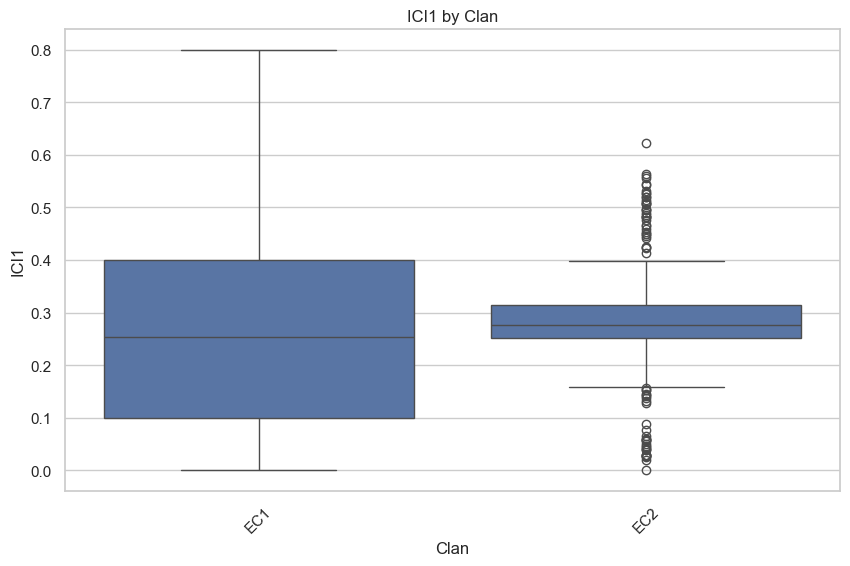

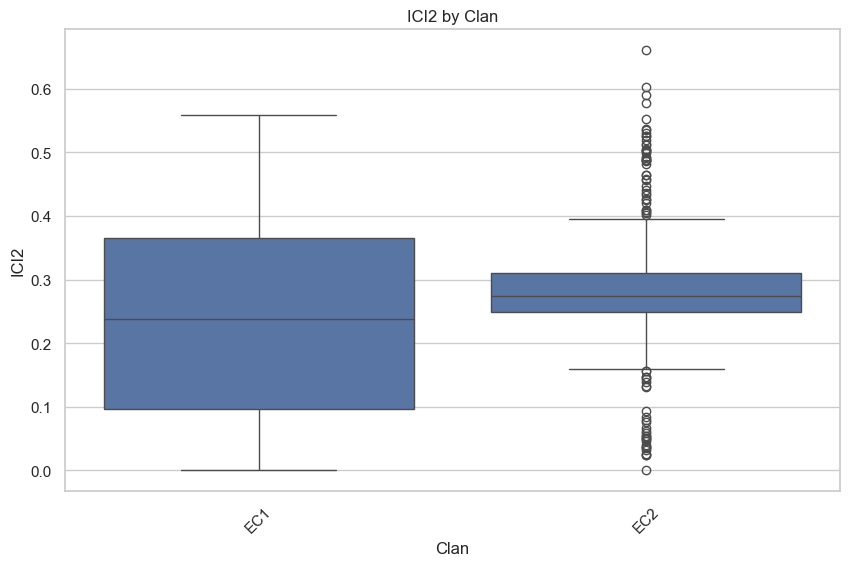

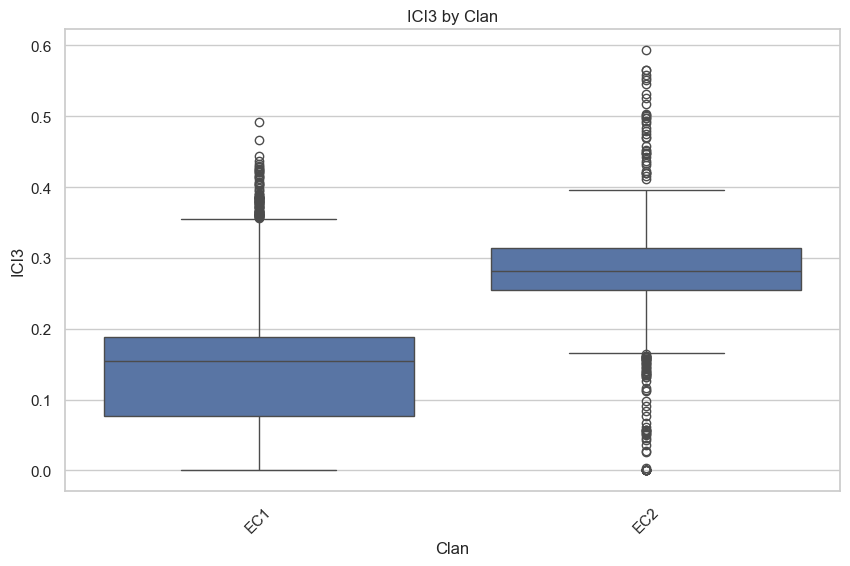

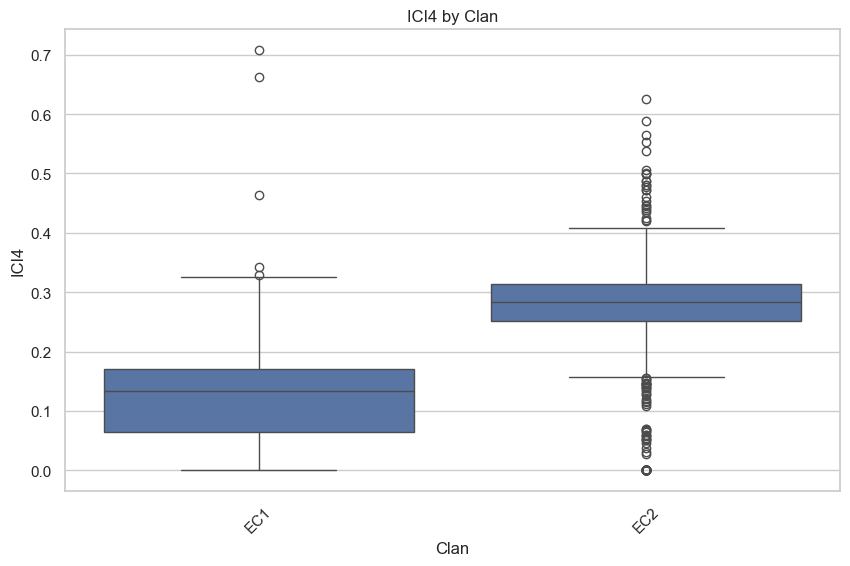

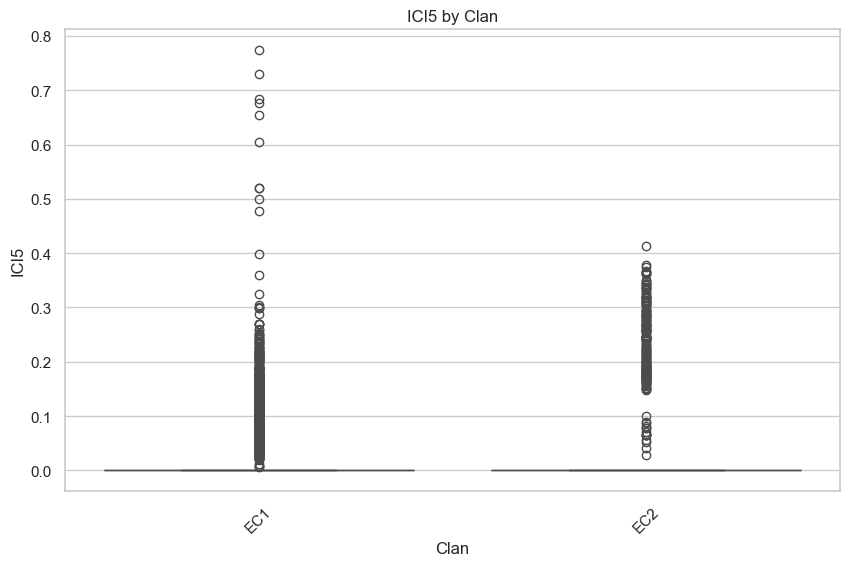

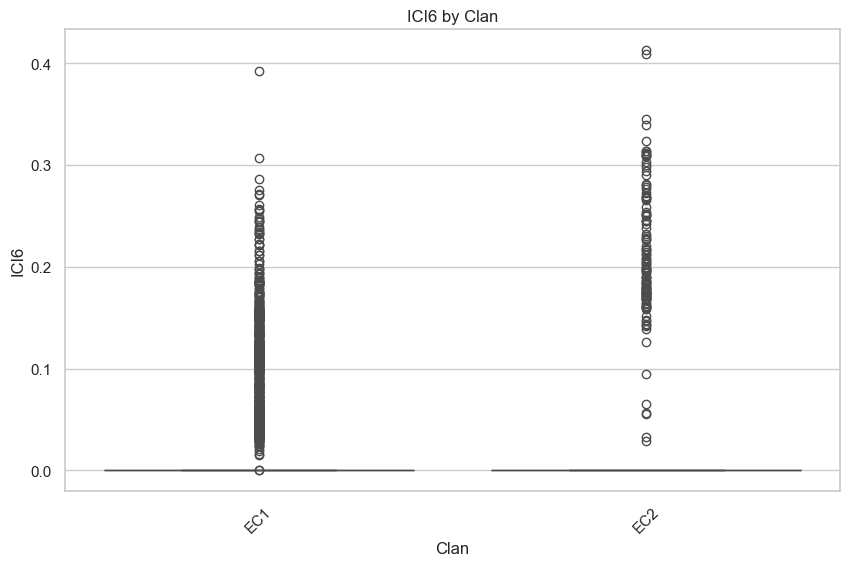

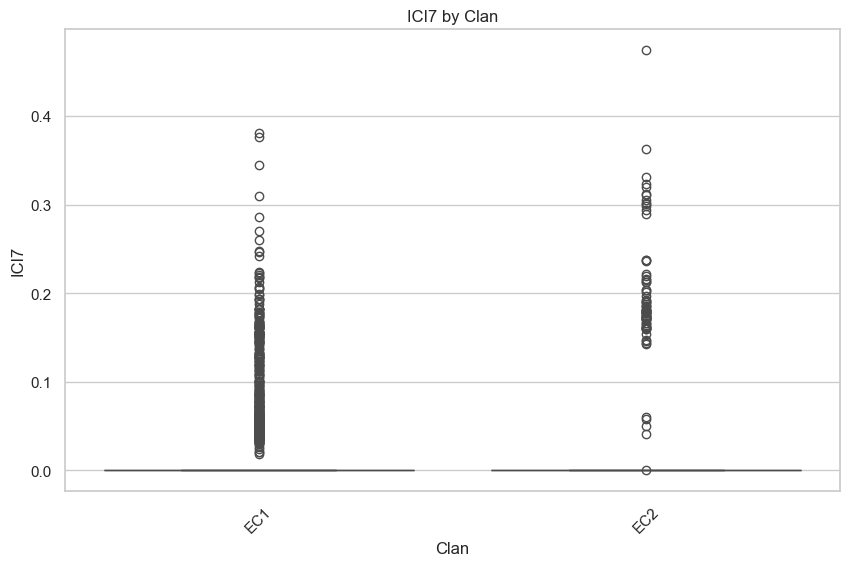

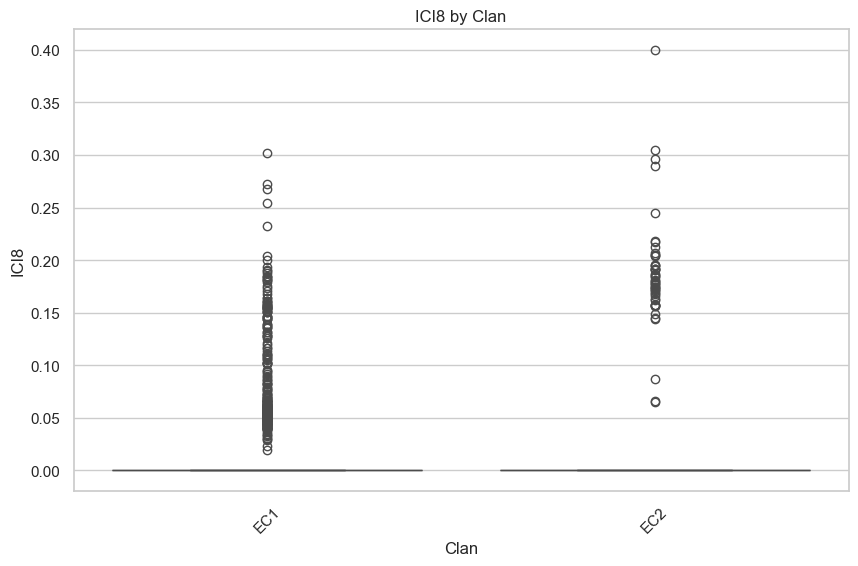

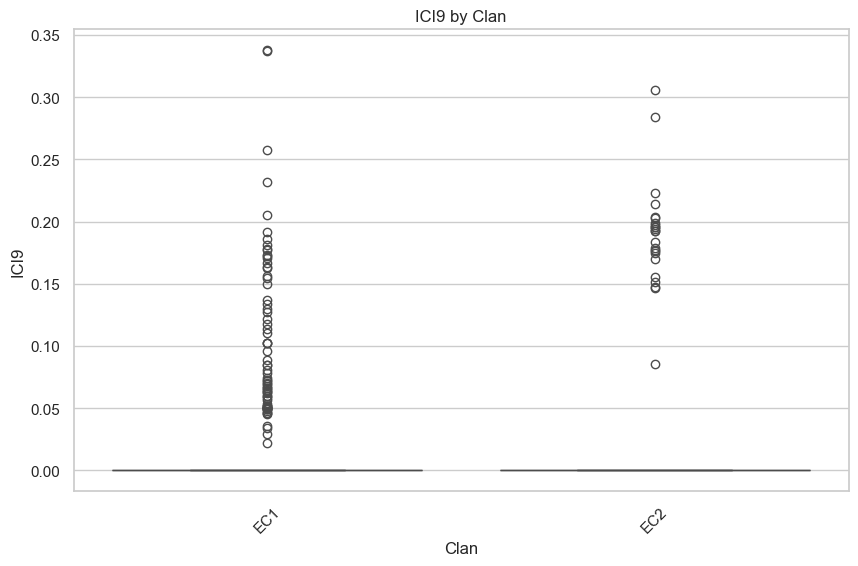

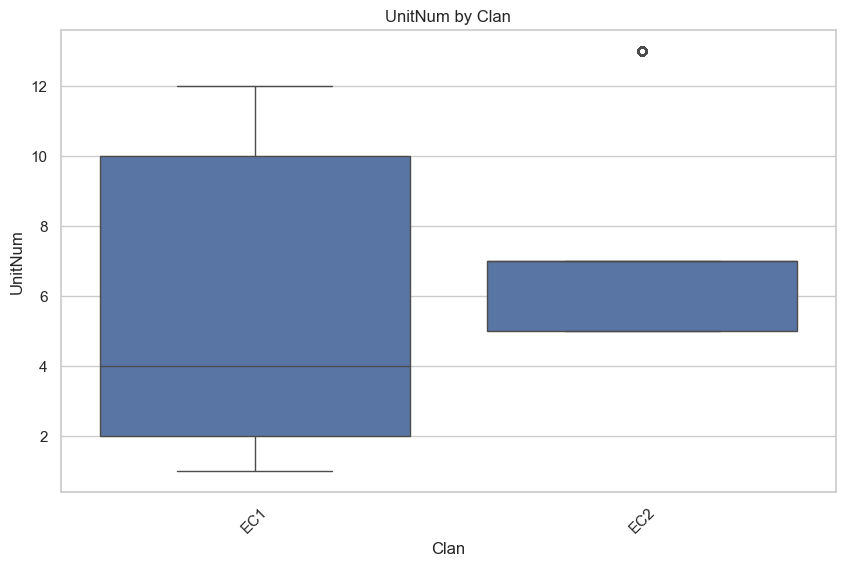

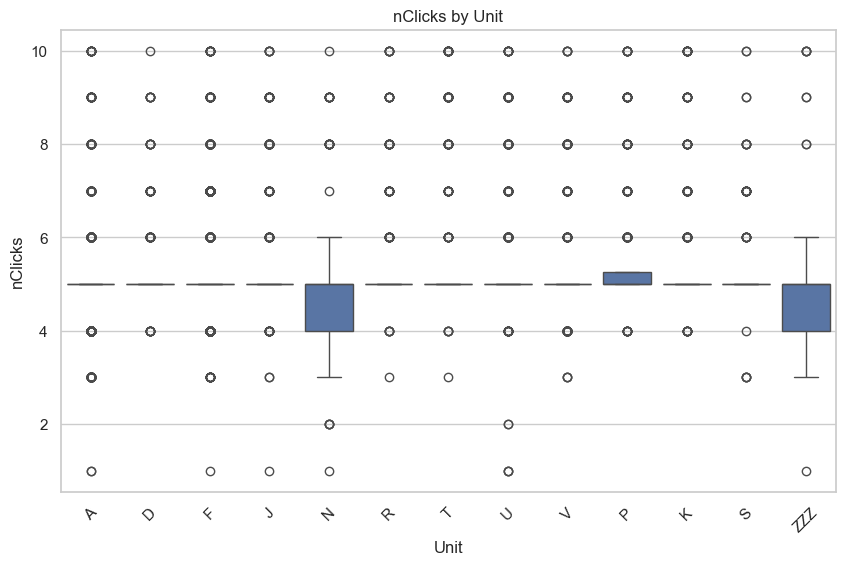

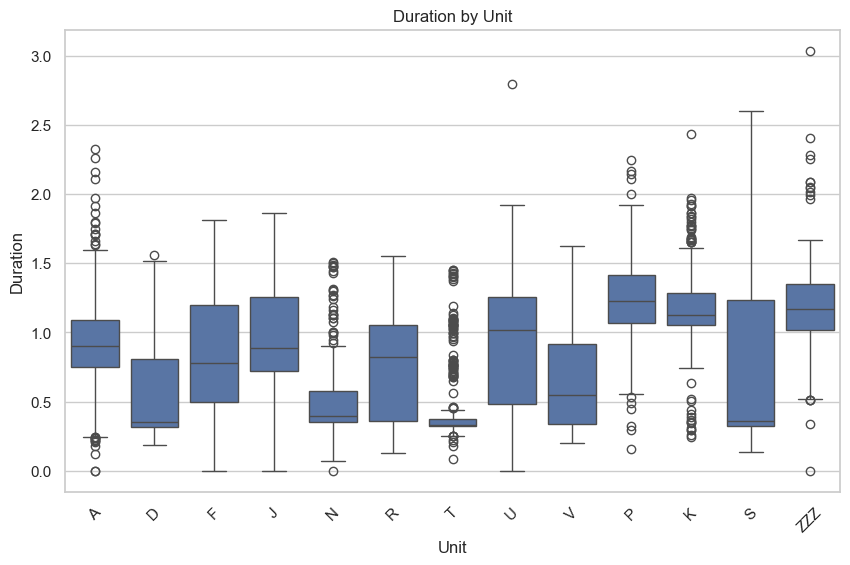

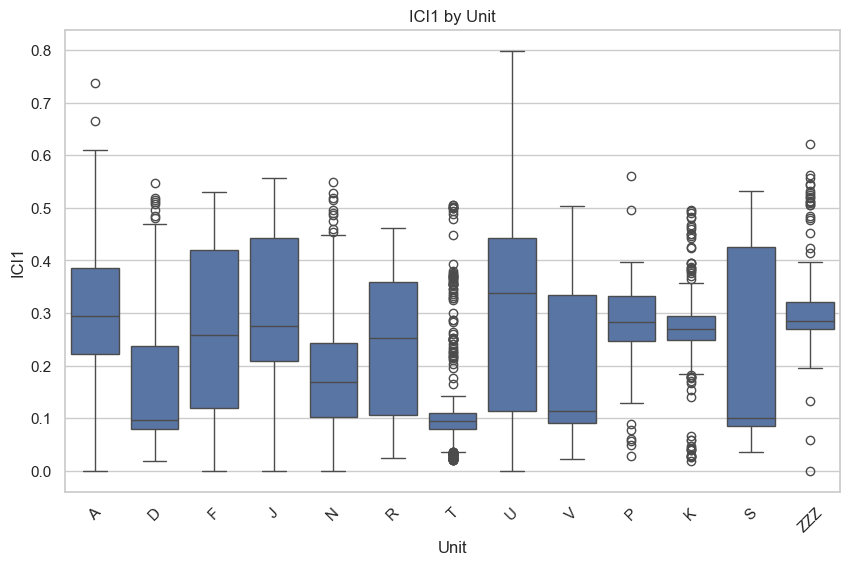

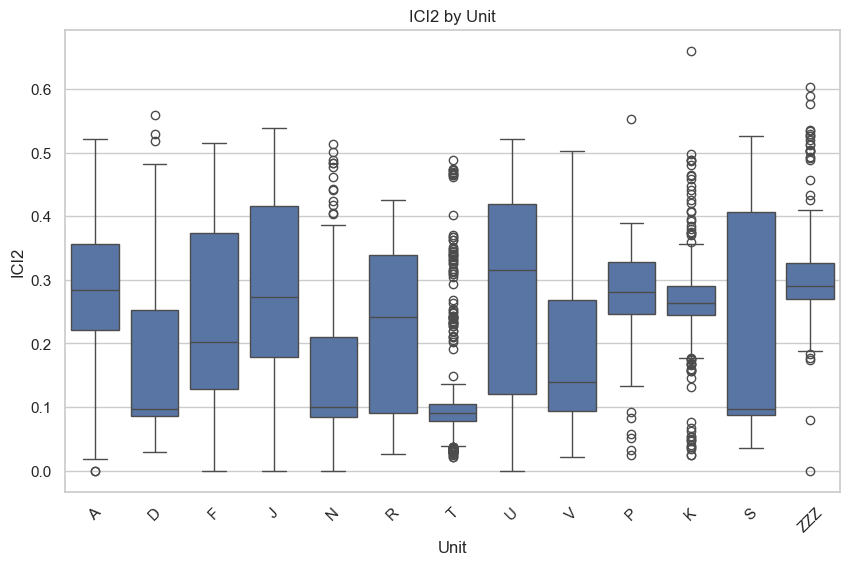

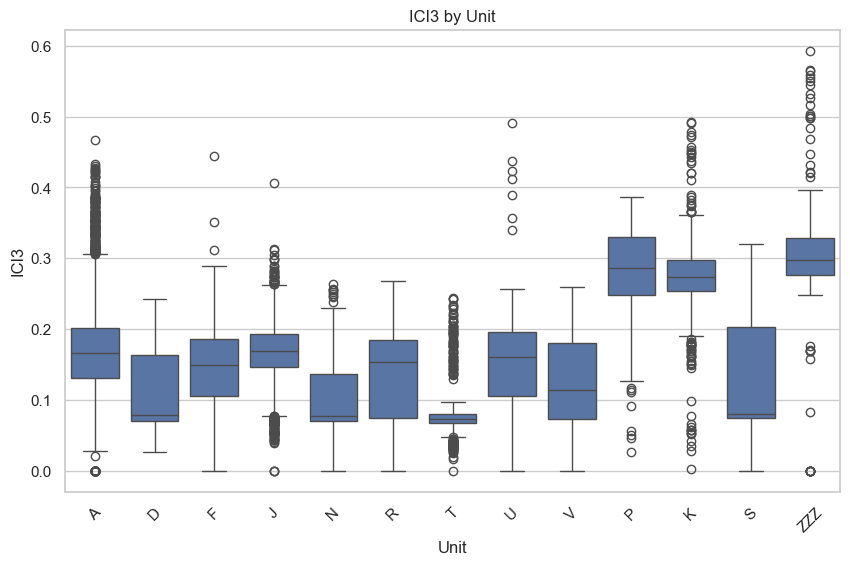

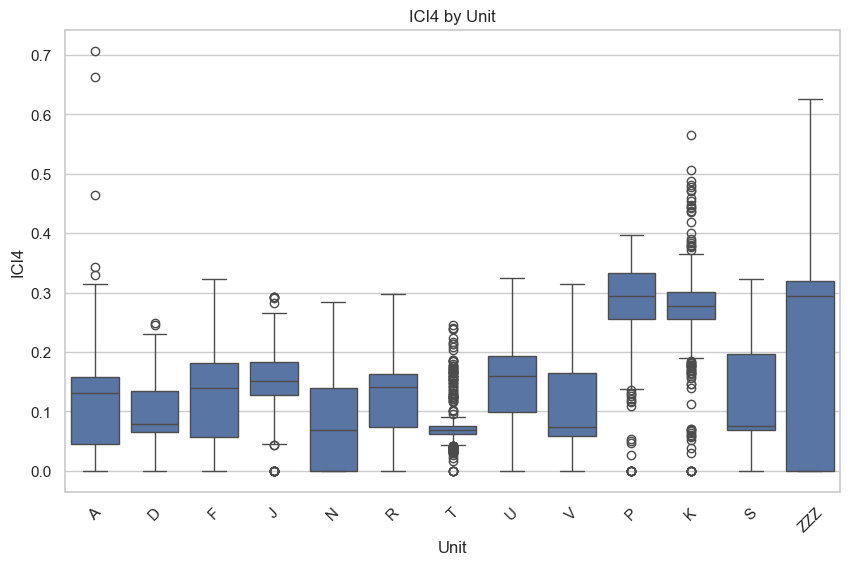

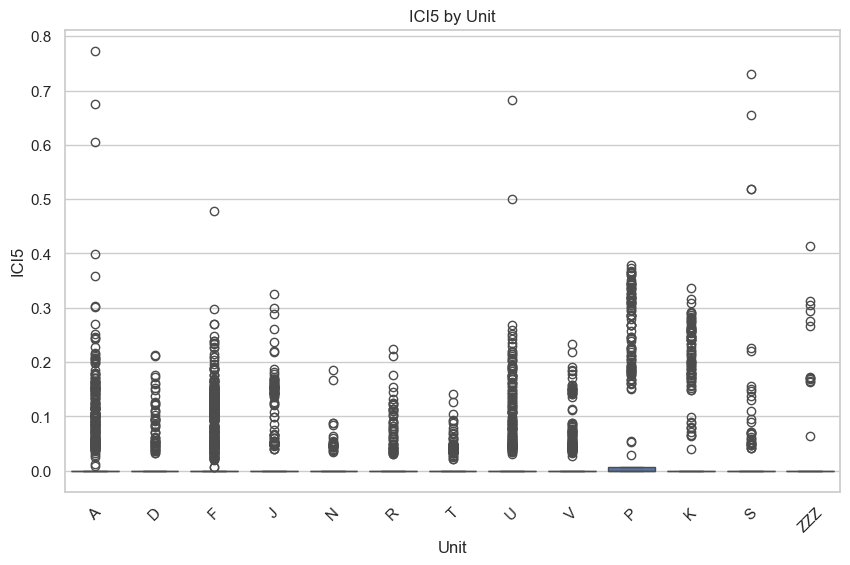

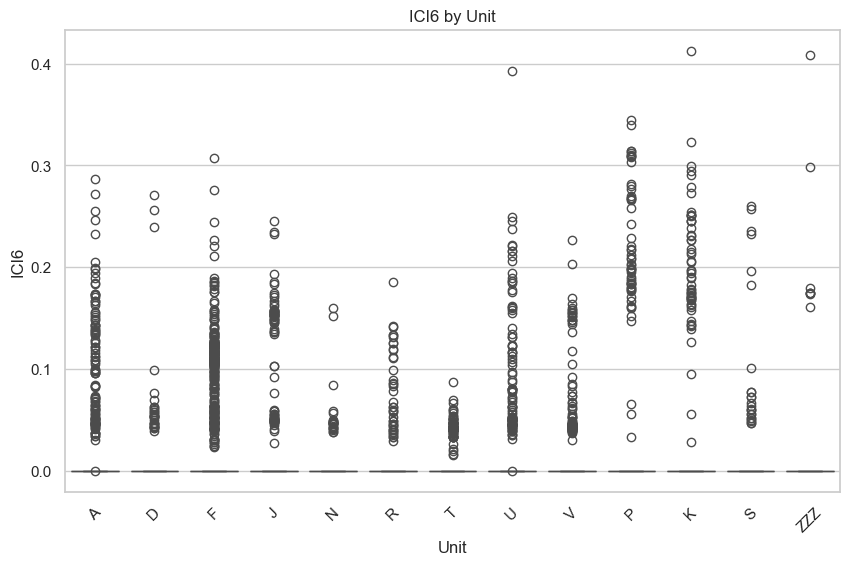

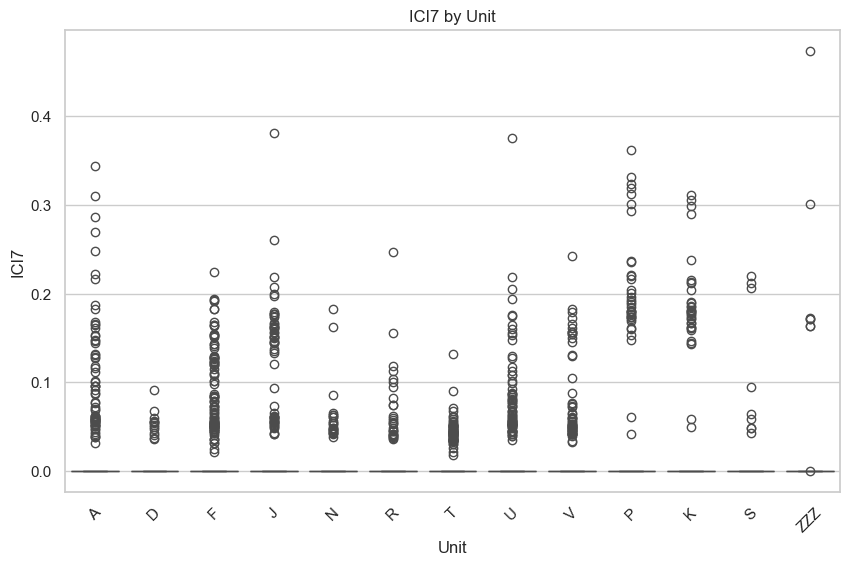

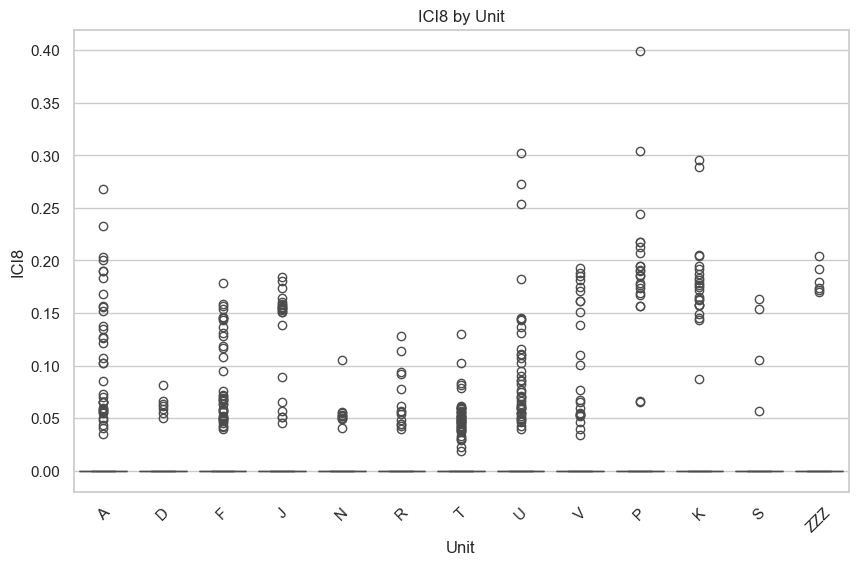

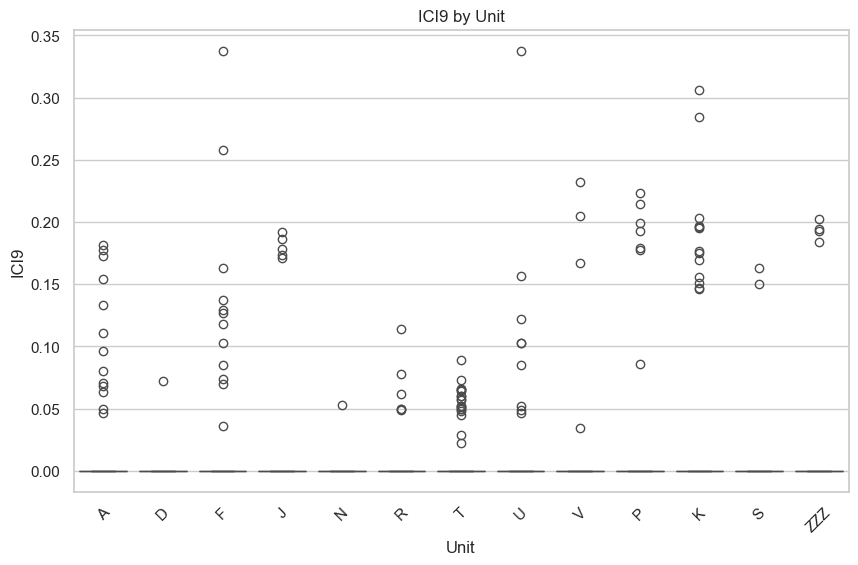

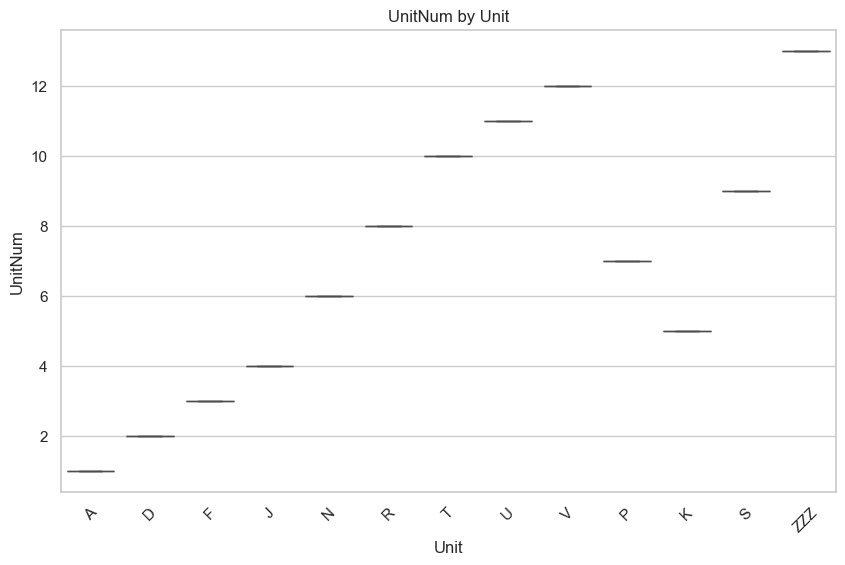

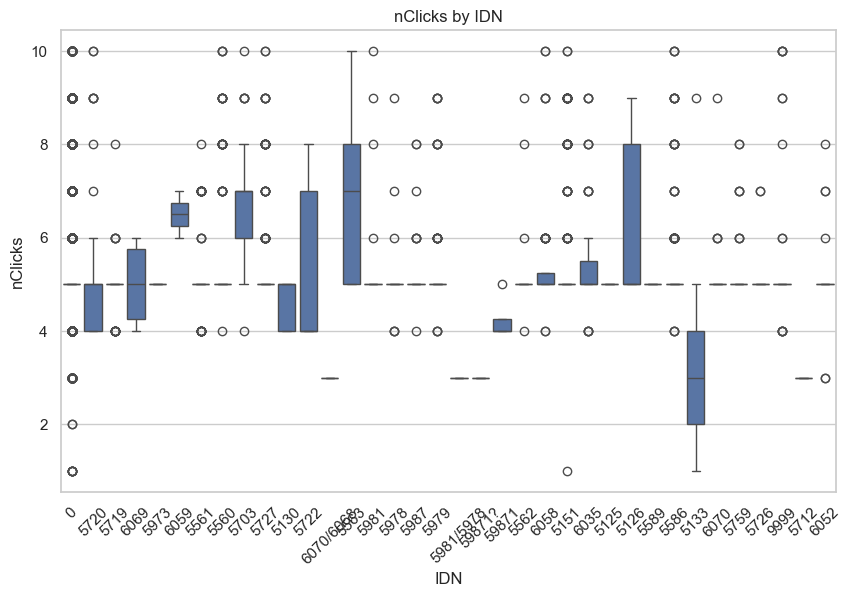

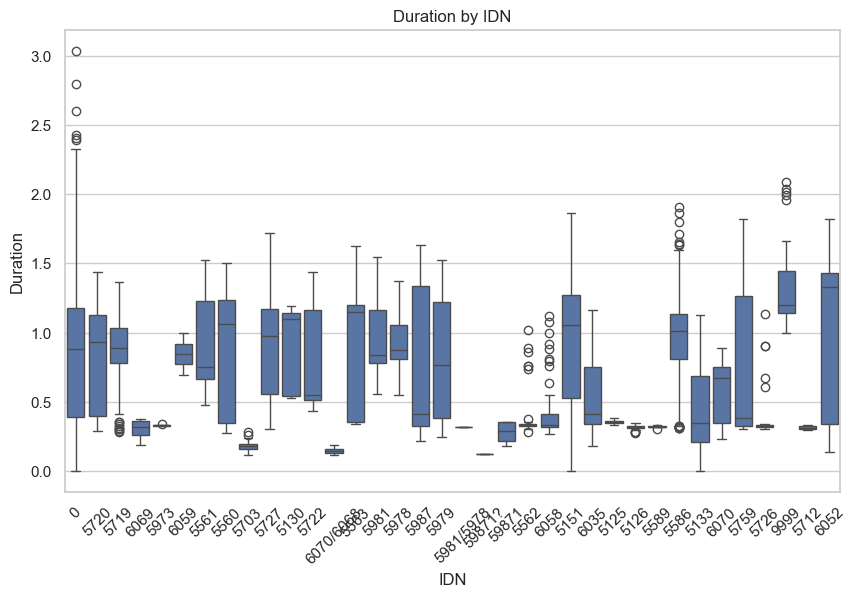

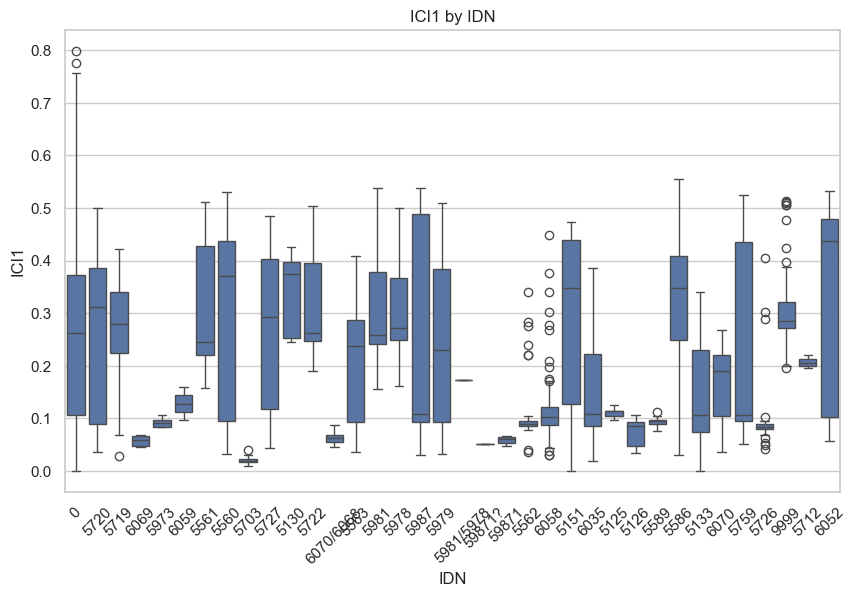

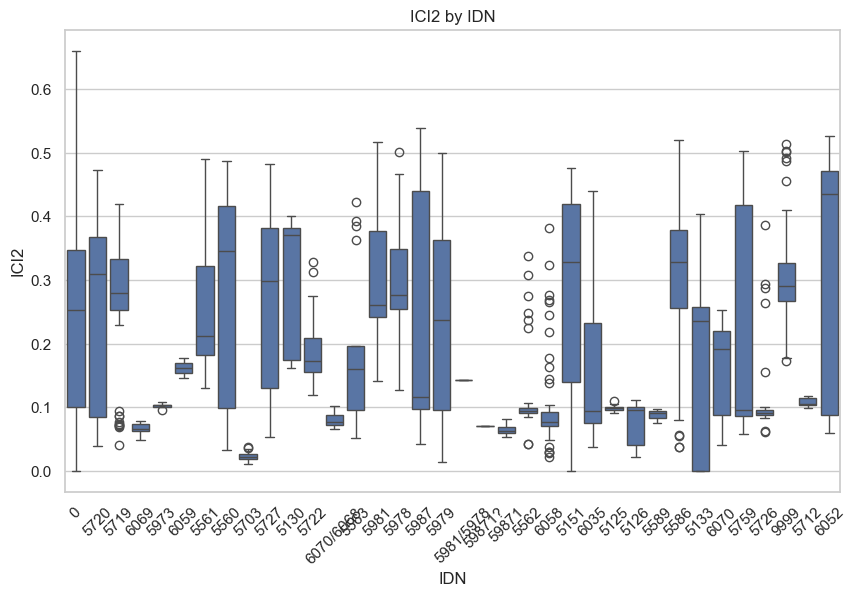

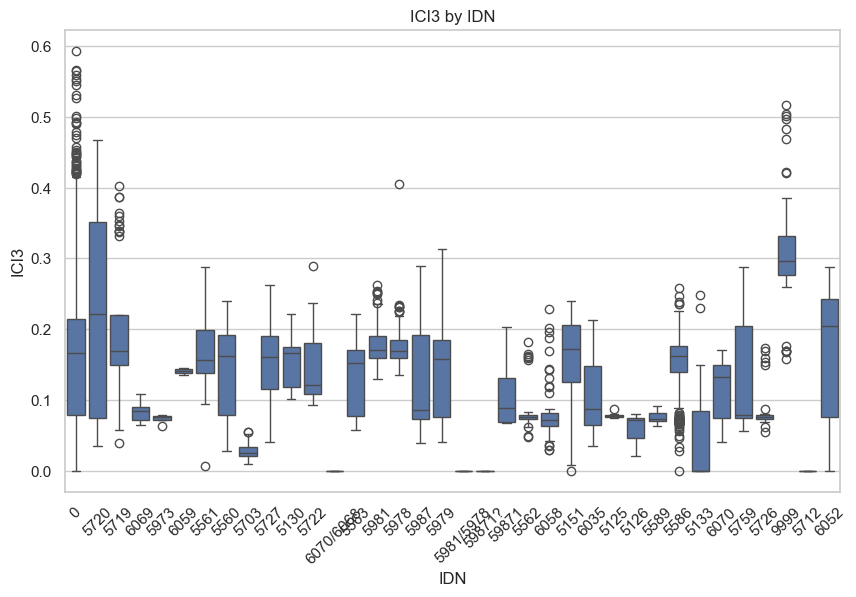

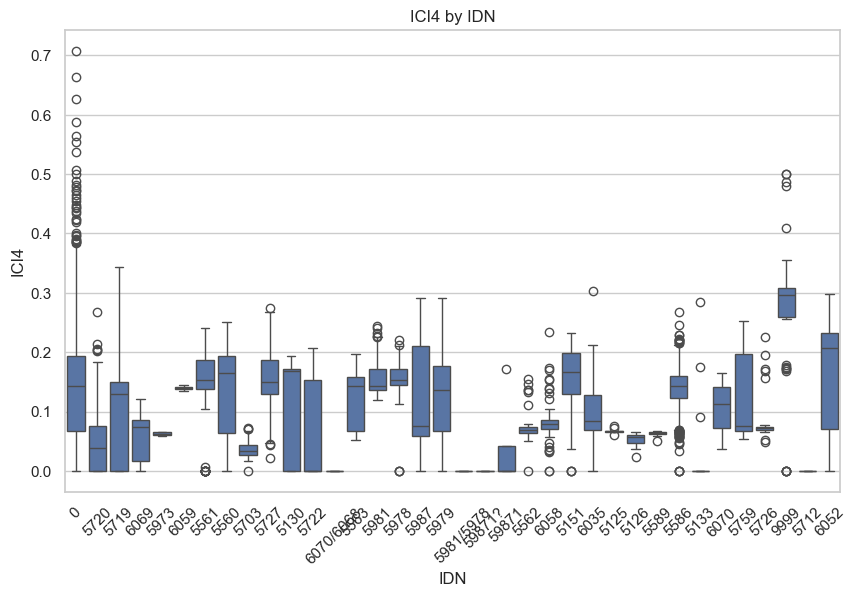

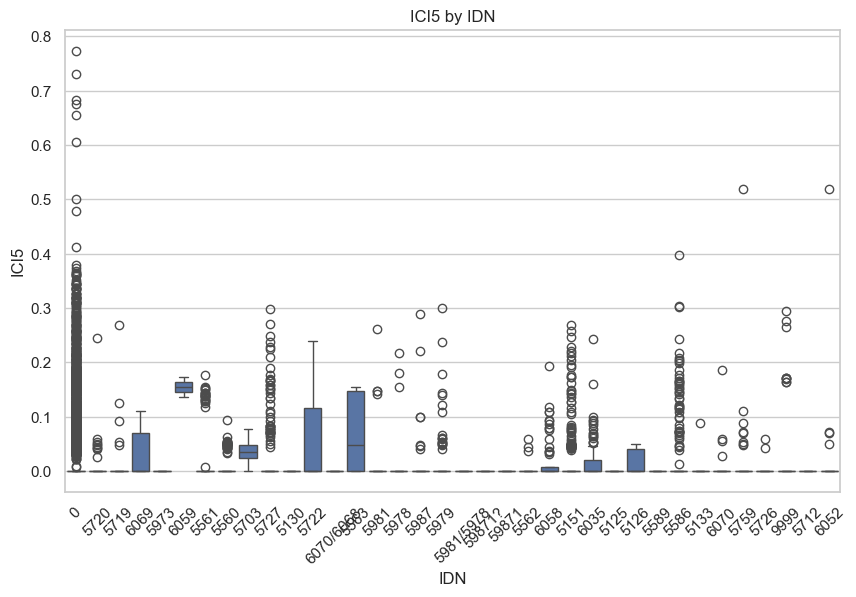

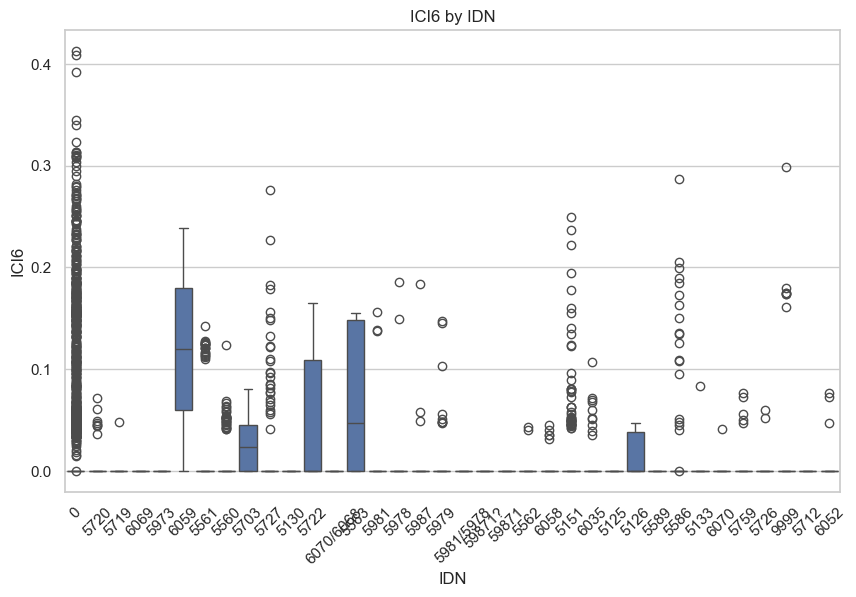

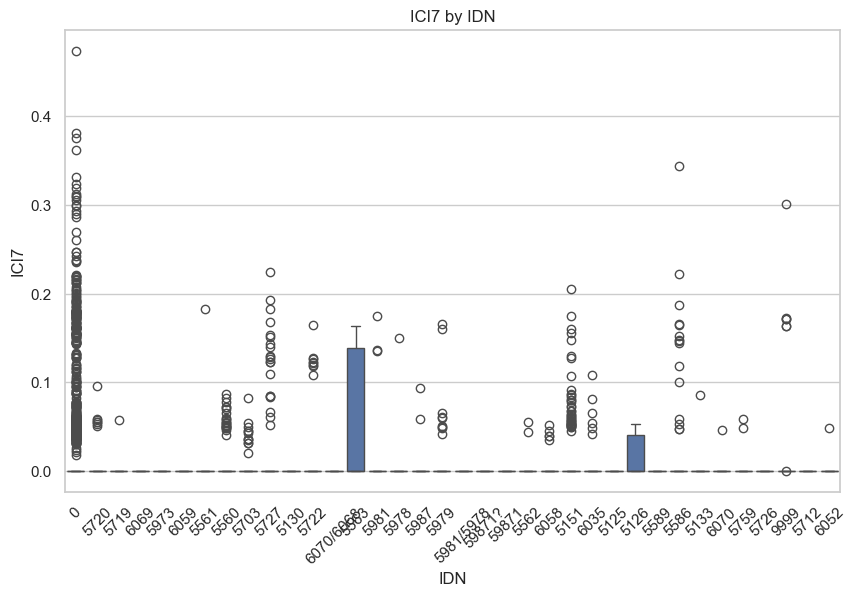

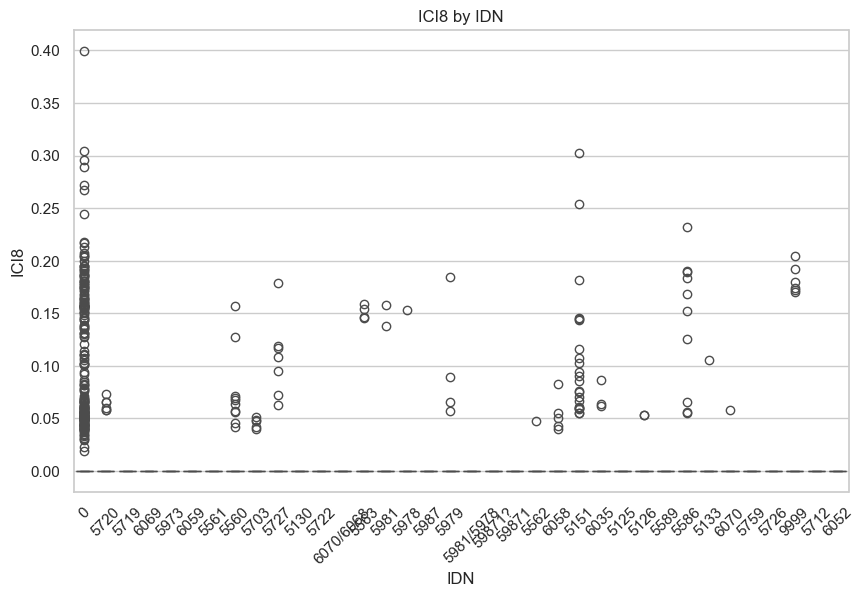

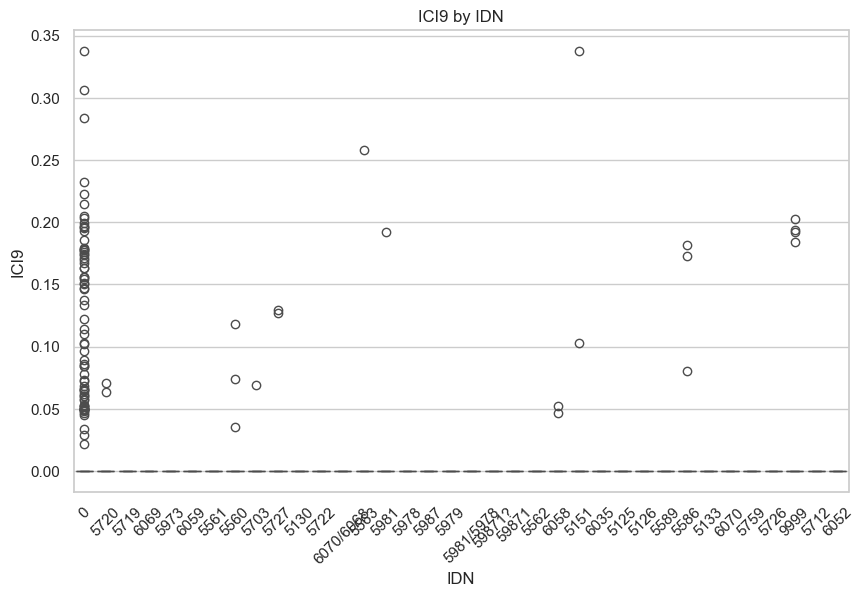

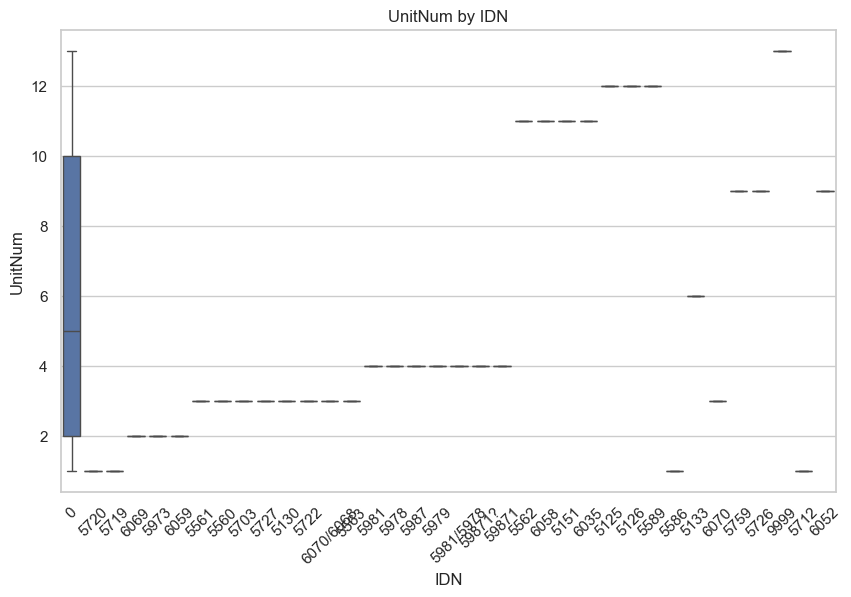

In [225]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()